In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.options.display.max_rows = 999

In [3]:
sns.set_style(style='ticks')

# 1. Data Exploring

In [4]:
Forward_coverage_df = pd.read_csv('../data/Group_Forward_coverage_df.csv', encoding='latin')
Forward_coverage_df = Forward_coverage_df.loc[Forward_coverage_df['Forecast'] > 0].loc[Forward_coverage_df['WholesaleCost'] > 0]

In [5]:
Forward_coverage_df

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,Forward Coverage %
0,2020-09-01,AZAQA1002,46622,Scents & Diffusers,Decorative Accents,Small Parcel,22.478326,21.2500,25.351495,-2.873169,1.12782
1,2020-09-01,AZAQA1003,46622,Scents & Diffusers,Decorative Accents,Small Parcel,3.358940,37.5000,3.788279,-0.429338,1.12782
2,2020-09-01,AZASA1001,56093,Massage Chairs,Upholstery - Niche,Large Parcel,463.258092,5749.9875,0.000000,463.258092,0.00000
3,2020-09-01,AZASA1003,56093,Massage Chairs,Upholstery - Niche,Small Parcel,45.215931,612.4875,0.000000,45.215931,0.00000
4,2020-09-01,AZASA1004,56093,Massage Therapy Products,Health & Fitness,Small Parcel,41.586504,140.4375,46.902073,-5.315568,1.12782
...,...,...,...,...,...,...,...,...,...,...,...
1598645,2021-08-01,ZAZZM2208,58698,Accent Pillows,Bedding,Small Parcel,14.803419,15.0000,0.000000,14.803419,0.00000
1598646,2021-08-01,ZAZZM2209,58698,Accent Pillows,Bedding,Small Parcel,17.704060,22.5000,0.000000,17.704060,0.00000
1598647,2021-08-01,ZAZZM2210,58698,Accent Pillows,Bedding,Small Parcel,23.035220,15.0000,0.000000,23.035220,0.00000
1598648,2021-08-01,ZAZZM2211,58698,Accent Pillows,Bedding,Small Parcel,11.532794,15.0000,0.000000,11.532794,0.00000


In [6]:
Forward_coverage_df[Forward_coverage_df.Forecast >= Forward_coverage_df.WholesaleCost]

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,Forward Coverage %
0,2020-09-01,AZAQA1002,46622,Scents & Diffusers,Decorative Accents,Small Parcel,22.478326,21.2500,25.351495,-2.873169,1.12782
13,2020-09-01,AZB10002,34638,Mixers & Mixer Accessories,Small Electrics,Small Parcel,111.199952,21.8125,0.000000,111.199952,0.00000
15,2020-09-01,AZB10004,34638,"Blenders, Smoothie Makers & Accessories",Small Electrics,Small Parcel,23.251798,20.6250,0.000000,23.251798,0.00000
16,2020-09-01,AZB10005,34638,Crock Pots & Slow Cookers,Small Electrics,Small Parcel,72.781488,34.8000,82.084384,-9.302897,1.12782
18,2020-09-01,AZB10008,34638,Toasters,Small Electrics,Small Parcel,31.203237,29.7625,0.000000,31.203237,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
1598637,2021-08-01,ZAZZM2190,58698,Kitchen Mats,Rugs,Small Parcel,32.688839,15.0000,36.867112,-4.178273,1.12782
1598640,2021-08-01,ZAZZM2195,58698,Kitchen Mats,Rugs,Small Parcel,32.085529,15.0000,0.000000,32.085529,0.00000
1598643,2021-08-01,ZAZZM2204,58698,Accent Pillows,Bedding,Small Parcel,22.481521,15.0000,0.000000,22.481521,0.00000
1598644,2021-08-01,ZAZZM2205,58698,Accent Pillows,Bedding,Small Parcel,17.286691,15.0000,0.000000,17.286691,0.00000


In [7]:
Forward_coverage_df.sort_values(['Forward Coverage %', 'Missed Sales'], ascending=[True, False])

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,Forward Coverage %
117945,2020-09-01,XCDHF2051,26962,Bar Stools,Furniture - Kitchen and Dining,Small Parcel,14.537171,127.225000,-197.342695,211.879865,-13.575042
539398,2020-12-01,XCMML1051,34638,Air Conditioners,Appliances,Small Parcel,412686.121633,418.862500,0.000000,412686.121633,0.000000
665912,2021-01-01,XCMML1051,34638,Air Conditioners,Appliances,Small Parcel,379585.557119,418.862500,0.000000,379585.557119,0.000000
539397,2020-12-01,XCMML1050,34638,Air Conditioners,Appliances,Small Parcel,348787.379560,444.075000,0.000000,348787.379560,0.000000
480213,2020-12-01,OLBQJ1062,1912,Freezers,Appliances,Small Parcel,332802.735618,275.362500,0.000000,332802.735618,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
553266,2020-12-01,ZALCT7849,35624,Canopies & Gazebos,Outdoor Structures & Spa,Small Parcel,40589.293507,407.662500,233462.266643,-192872.973135,5.751819
278181,2020-11-01,HSAJE1012,58748,Adjustable Beds,Mattresses,Small Parcel,81.768897,474.583333,528.361832,-446.592935,6.461648
371021,2020-11-01,VEBNJ8143,58336,TV Stands & Entertainment Centers,Entertainment Furniture,Small Parcel,58.940482,124.462500,412.667233,-353.726751,7.001423
640055,2021-01-01,VEBNJ8143,58336,TV Stands & Entertainment Centers,Entertainment Furniture,Small Parcel,66.976714,124.462500,481.910549,-414.933835,7.195195


In [8]:
Forward_coverage_df_final = Forward_coverage_df.sort_values(['Date', 'Missed Sales'], ascending=[True, False])
Forward_coverage_df_final['cumsum'] = Forward_coverage_df_final.groupby('Date')['Missed Sales'].transform(pd.Series.cumsum)
#Forward_coverage_df_final.to_csv('../data/Forward_coverage_df_final.csv', index=False)
Forward_coverage_df_final

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,Forward Coverage %,cumsum
21071,2020-09-01,FUPHA1059,57389,Patio Heaters,Fireplaces & Grills,Small Parcel,62596.580848,262.4875,11339.460000,51257.120848,0.181151,5.125712e+04
5238,2020-09-01,CXBRH1163,52963,Bath Towels,Bath,Small Parcel,28899.758409,175.0625,0.000000,28899.758409,0.000000,8.015688e+04
86033,2020-09-01,UFAEK1000,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,24864.704380,216.2500,0.000000,24864.704380,0.000000,1.050216e+05
138610,2020-09-01,ZATAT1069,34638,Air Conditioners,Appliances,Small Parcel,20722.065062,304.0875,0.000000,20722.065062,0.000000,1.257436e+05
16376,2020-09-01,EVRKG9112,37882,Outdoor Conversation Sets,Outdoor,Small Parcel,20484.621761,300.0000,0.000000,20484.621761,0.000000,1.462283e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
1514714,2021-08-01,OLKJP1062,35624,Canopies & Gazebos,Outdoor Structures & Spa,Small Parcel,1725.675878,282.5000,4671.002377,-2945.326499,2.706767,1.702763e+07
1543028,2021-08-01,UFAEK1001,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,14556.517073,247.5000,17511.599486,-2955.082413,1.203008,1.702467e+07
1573139,2021-08-01,XCBFX1203,33417,Air Conditioners,Appliances,Small Parcel,1853.511756,342.1250,5017.024301,-3163.512546,2.706767,1.702151e+07
1561310,2021-08-01,WDBP10007,657,Deck Boxes,Outdoor Structures & Spa,Small Parcel,1362.962087,45.0000,6017.886444,-4654.924357,4.415300,1.701685e+07


In [9]:
Forward_coverage_df_final['Missed_Sale_amount'] = Forward_coverage_df_final['Missed Sales'] / Forward_coverage_df_final['WholesaleCost']

<AxesSubplot:xlabel='Missed Sales', ylabel='Missed_Sale_amount'>

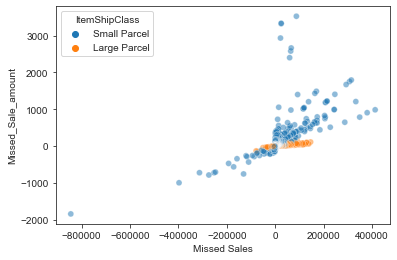

In [10]:
sns.scatterplot(x='Missed Sales', y='Missed_Sale_amount', data=Forward_coverage_df_final, alpha = 0.5, hue="ItemShipClass", linewidths=0)

In [11]:
Forward_coverage_df_final['Priority_score'] = Forward_coverage_df_final['Missed Sales'] + Forward_coverage_df_final['Missed_Sale_amount'] * 100

<AxesSubplot:xlabel='Missed Sales', ylabel='Priority_score'>

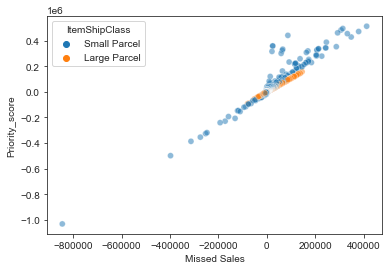

In [12]:
sns.scatterplot(x='Missed Sales', y='Priority_score', data=Forward_coverage_df_final, alpha = 0.5, hue="ItemShipClass", linewidths=0)

# 2. Continue Processing Data

Before:
- subset data: non-negative missed sales, we need to fill the gap.
- non-negative wholesale cost & forecast value: remove records that do not make sense.
- risks: production capacity limitation, adjust proposed demand (forecast / wholesale cost) for high avg wholesale cost items.

Now:
- adding adjust proposed demand effect to 2020-09-01 and 2020-10-01
- adding parcel size effect to 2020-09-01 and 2020-10-01

In [13]:
pool1 = pd.read_csv('../data/optimized pool.csv')
pool2 = pd.read_csv('../data/substitution.csv')

In [14]:
pool2 = pool2.drop('Unnamed: 0',axis = 1)
pool = pd.concat([pool1, pool2])
pool

,Date,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,L2marker,NoL2marker,WholesaleCost,Demand,CoveredSales,MissedDemand,DemandCount,MissedCount,InStockPerc,qty_fulfilled_oh,qty_fulfilled_oo,qty_fulfilled_if,qty_fulfilled_l2,CostCategory
0,2020-09-01,AZB10002,34638,Small Electrics,Mixers & Mixer Accessories,Small Parcel,1.0,2.0,21.8125,111.199952,0.0,111.199952,5.097992,5.097992,0.0,0.0,0.0,0.0,0.0,high
1,2020-09-01,AZB10004,34638,Small Electrics,"Blenders, Smoothie Makers & Accessories",Small Parcel,1.0,2.0,20.6250,23.251798,0.0,23.251798,1.127360,1.127360,0.0,0.0,0.0,0.0,0.0,high
2,2020-09-01,AZB10008,34638,Small Electrics,Toasters,Small Parcel,1.0,2.0,29.7625,31.203237,0.0,31.203237,1.048408,1.048408,0.0,0.0,0.0,0.0,0.0,high
3,2020-09-01,AZB10019,34638,Small Electrics,Mixers & Mixer Accessories,Small Parcel,1.0,2.0,49.1875,3060.102226,0.0,3060.102226,62.213006,62.213006,0.0,0.0,0.0,0.0,0.0,high
4,2020-09-01,AZB10023,34638,Small Electrics,Coffee Makers,Small Parcel,1.0,2.0,35.3375,154.283044,0.0,154.283044,4.365986,4.365986,0.0,0.0,0.0,0.0,0.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916934,2021-08-01,ZAZZM2203,58698,Bedding,Accent Pillows,Small Parcel,1.0,2.0,15.0000,5.776673,0.0,5.776673,0.385112,0.385112,0.0,0.0,0.0,0.0,0.0,low
916935,2021-08-01,ZAZZM2208,58698,Bedding,Accent Pillows,Small Parcel,1.0,2.0,15.0000,14.803419,0.0,14.803419,0.986895,0.986895,0.0,0.0,0.0,0.0,0.0,low
916936,2021-08-01,ZAZZM2209,58698,Bedding,Accent Pillows,Small Parcel,1.0,2.0,22.5000,17.704060,0.0,17.704060,0.786847,0.786847,0.0,0.0,0.0,0.0,0.0,low
916937,2021-08-01,ZAZZM2211,58698,Bedding,Accent Pillows,Small Parcel,1.0,2.0,15.0000,11.532794,0.0,11.532794,0.768853,0.768853,0.0,0.0,0.0,0.0,0.0,low


In [15]:
pool = pool.drop(['NoL2marker','qty_fulfilled_oh','qty_fulfilled_oo','qty_fulfilled_if','qty_fulfilled_l2','CostCategory','InStockPerc', 'DemandCount'],axis=1)
pool['MissedCount1'] = pool['Demand'] /pool['WholesaleCost']

In [16]:
pool= pool.rename(columns={"Demand": "Forecast", "CoveredSales": "Covered Sales","MissedDemand": "Missed Sales", "MissedCount": "MissedCount2","CoveredSales": "Covered Sales" })

In [17]:
pool.sort_values(['Date'], ascending=[True])

,Date,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,L2marker,WholesaleCost,Forecast,Covered Sales,Missed Sales,MissedCount2,MissedCount1
0,2020-09-01,AZB10002,34638,Small Electrics,Mixers & Mixer Accessories,Small Parcel,1.0,21.8125,111.199952,0.0,111.199952,5.097992,5.097992
24780,2020-09-01,MNDHV1062,26436,Decorative Accents,Wall Clocks,Small Parcel,1.0,18.7500,7.695218,0.0,7.695218,0.410412,0.410412
24781,2020-09-01,MNDHV1085,26436,Lighting,Table Lamps,Small Parcel,1.0,19.5000,9.325512,0.0,9.325512,0.478231,0.478231
24782,2020-09-01,MNDHV1091,26436,Education,Carts & Stands,Small Parcel,1.0,28.5000,2.626857,0.0,2.626857,0.092170,0.092170
24783,2020-09-01,MNDHV1099,26436,Decorative Accents,Wall Clocks,Small Parcel,1.0,18.7500,7.702748,0.0,7.702748,0.410813,0.410813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848138,2021-08-01,GTTYB1056,63522,Accent Furniture,Accent Chests / Cabinets,Small Parcel,1.0,218.7500,45.006925,0.0,45.006925,0.205746,0.205746
848137,2021-08-01,GTTYB1052,63522,Storage and Org,"Boxes, Bins, Baskets, & Buckets",Small Parcel,1.0,87.5000,52.495998,0.0,52.495998,0.599954,0.599954
848136,2021-08-01,GTTYB1036,63522,Tabletop,Serving Dishes & Platters,Small Parcel,1.0,93.7500,75.333606,0.0,75.333606,0.803558,0.803558
848146,2021-08-01,GTUA10002,1096,Recreation,Lawn Games,Small Parcel,1.0,46.8750,8.821318,0.0,8.821318,0.188188,0.188188


In [18]:
month910 = pool[pool.Date.isin(['2020-09-01','2020-10-01'])]
# month910
monthrest = pool[~pool.Date.isin(['2020-09-01','2020-10-01'])]
# monthrest

In [19]:
month910['Missed_Sale_amount'] = month910[['MissedCount2','MissedCount1']].min(axis=1)
month910['Parcel_Effect'] = np.where(month910.ItemShipClass == 'Small Parcel',1.5,1) # considering parcel size
monthrest['Missed_Sale_amount'] = monthrest['MissedCount1']
monthrest['Parcel_Effect'] = 1 # parcel size does not matter

<ipython-input-19-f1af9a80416d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month910['Missed_Sale_amount'] = month910[['MissedCount2','MissedCount1']].min(axis=1)
<ipython-input-19-f1af9a80416d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month910['Parcel_Effect'] = np.where(month910.ItemShipClass == 'Small Parcel',1.5,1) # considering parcel size
<ipython-input-19-f1af9a80416d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [20]:
Forward_coverage_positive = pd.concat([month910, monthrest])
Forward_coverage_positive['Priority_score'] = (Forward_coverage_positive['Missed Sales'] + Forward_coverage_positive['Missed_Sale_amount'] * 100) *Forward_coverage_positive['Parcel_Effect']
Forward_coverage_positive = Forward_coverage_positive.sort_values(['Date','Missed Sales'], ascending=[True, False])
Forward_coverage_positive['cumsum'] = Forward_coverage_positive.groupby('Date')['Missed Sales'].transform(pd.Series.cumsum)

In [21]:
Forward_coverage_positive.SKU.nunique()

146616

In [22]:
Forward_coverage_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090054 entries, 1059 to 897697
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1090054 non-null  object 
 1   SKU                    1090054 non-null  object 
 2   suid                   1090054 non-null  int64  
 3   ItemMarketingCategory  1090054 non-null  object 
 4   ItemClass              1090054 non-null  object 
 5   ItemShipClass          1090054 non-null  object 
 6   L2marker               1090054 non-null  float64
 7   WholesaleCost          1090054 non-null  float64
 8   Forecast               1090054 non-null  float64
 9   Covered Sales          1090054 non-null  float64
 10  Missed Sales           1090054 non-null  float64
 11  MissedCount2           1090054 non-null  float64
 12  MissedCount1           1090054 non-null  float64
 13  Missed_Sale_amount     1090054 non-null  float64
 14  Parcel_Effect   

             knee
2020-09-01  13026
2020-10-01  12352
2020-11-01  14002
2020-12-01  12264
2021-01-01  11305
2021-02-01   7029
2021-03-01  11740
2021-04-01  11220
2021-05-01  16081
2021-06-01  15118
2021-07-01  15927
2021-08-01  16595


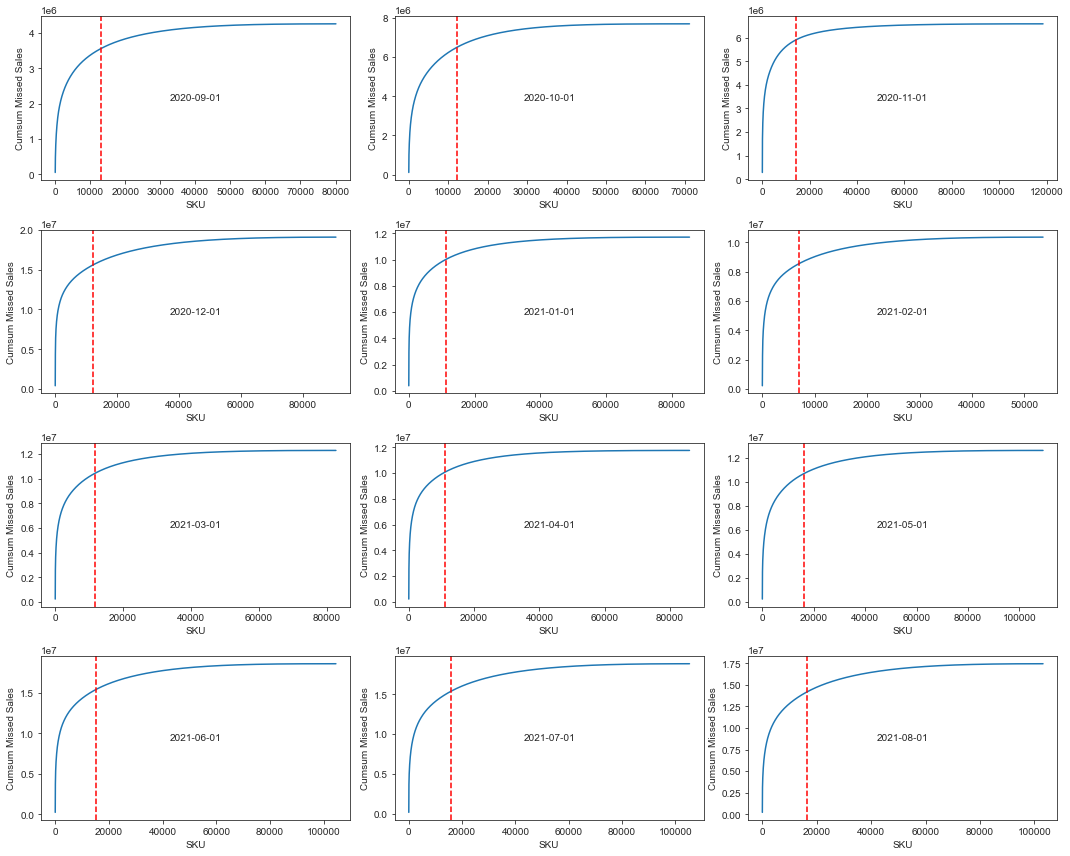

In [23]:
from kneed import KneeLocator

dates = [#'2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
         '2020-09-01', '2020-10-01', '2020-11-01',
         '2020-12-01', '2021-01-01', '2021-02-01',
         '2021-03-01', '2021-04-01', '2021-05-01',
         '2021-06-01', '2021-07-01', '2021-08-01']

plt.close()
fig = plt.figure(figsize=(15,12))

knees = []
for di, date in enumerate(dates):
    ax = fig.add_subplot(4,3,di+1)

    ids = Forward_coverage_positive.Date==date
    x = np.arange(len(Forward_coverage_positive.values[ids]))
    y = Forward_coverage_positive['cumsum'].values[ids]
    kl = KneeLocator(x, y, curve="concave", direction="increasing")
    knee = kl.knee
    knees.append(knee)

    ax.plot(x, y)
    ax.axvline(knee, c='r', ls='--')
    ax.text(0.5, 0.5, date, ha='center', va='center', transform=ax.transAxes)
    ax.set_xlabel('SKU')
    ax.set_ylabel('Cumsum Missed Sales')

plt.tight_layout()
#plt.savefig('')

df_cutoff = pd.DataFrame(data={'knee':knees}, index=dates)
print(df_cutoff)

In [24]:
df_cutoff

,knee
2020-09-01,13026
2020-10-01,12352
2020-11-01,14002
2020-12-01,12264
2021-01-01,11305
2021-02-01,7029
2021-03-01,11740
2021-04-01,11220
2021-05-01,16081
2021-06-01,15118


In [25]:
monthly_sku_count = pd.DataFrame(Forward_coverage_positive.groupby('Date')['SKU'].count()).reset_index()
monthly_sku_count

,Date,SKU
0,2020-09-01,80113
1,2020-10-01,71187
2,2020-11-01,118490
3,2020-12-01,90670
4,2021-01-01,85362
5,2021-02-01,53576
6,2021-03-01,82590
7,2021-04-01,85912
8,2021-05-01,109204
9,2021-06-01,104512


In [26]:
df_cutoff.reset_index()

,index,knee
0,2020-09-01,13026
1,2020-10-01,12352
2,2020-11-01,14002
3,2020-12-01,12264
4,2021-01-01,11305
5,2021-02-01,7029
6,2021-03-01,11740
7,2021-04-01,11220
8,2021-05-01,16081
9,2021-06-01,15118


In [27]:
merge = monthly_sku_count.merge(df_cutoff.reset_index(), left_on = 'Date', right_on = 'index')
merge
merge1 = merge[['SKU','knee']].rename(columns= {'SKU': 'SKU count', 'knee': 'Prioritized SKU count'})
merge1

,SKU count,Prioritized SKU count
0,80113,13026
1,71187,12352
2,118490,14002
3,90670,12264
4,85362,11305
5,53576,7029
6,82590,11740
7,85912,11220
8,109204,16081
9,104512,15118


In [28]:
# merge1['%'] = merge1['Prioritized SKU count']/merge1['SKU count']
# merge1.mean()

In [29]:
# merge1

Text(0.5, 1.0, 'Prioritized SKU Count vs. Total SKU Count')

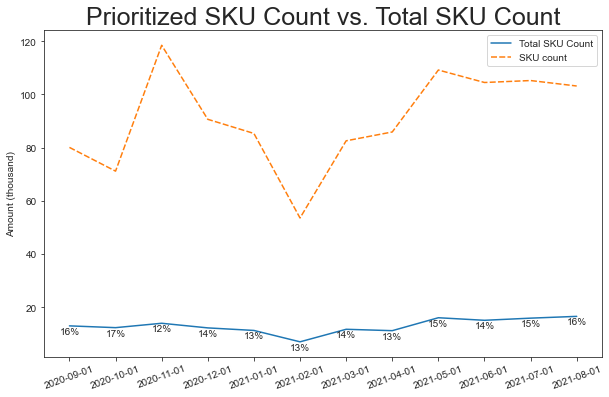

In [30]:
plt.close()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.lineplot(data=merge1[['Prioritized SKU count', 'SKU count']]/1e3, ax=ax)

for i in range(12):
    perc = merge1['Prioritized SKU count'].iloc[i]/merge1['SKU count'].iloc[i]*100
    ax.text(i, merge1['Prioritized SKU count'].iloc[i]/1e3-0.5, f'{perc:.0f}%', ha='center', va='top')
ax.set_ylabel('Amount (thousand)')
ax.set_xticks(np.arange(12))
ax.set_xticklabels(dates, rotation=20)
L=plt.legend()
L.get_texts()[0].set_text('Total SKU Count')
plt.title('Prioritized SKU Count vs. Total SKU Count', fontsize= 25)
#fig.savefig(f'../plots/newplot/SKU_SelectionResult.png')

In [31]:
# !!! this is the final data (positive part)!!!
Forward_coverage_positive
Forward_coverage_positive.to_csv('../data/final_positive_data.csv', index=False)

In [32]:
# test cumsum
# Forward_coverage_positive[Forward_coverage_positive.Date.isin(['2021-08-01']) ]

# 3. SKU Based Selection

##  3.1 Top 1000 SKU Every Month

In [33]:
Forward_coverage_positive = Forward_coverage_positive.sort_values(by = ['Date', 'Priority_score'], ascending =[True, False])

In [34]:
#Forward_coverage_positive_1000 = Forward_coverage_positive.groupby('Date').head(1000).set_index(['Date'], drop=True)
Forward_coverage_positive_1000 = pd.concat(
    [Forward_coverage_positive[Forward_coverage_positive.Date==date].iloc[:df_cutoff.loc[date].iloc[0]] for date in dates],
    axis=0, ignore_index=True)

In [35]:
df_cutoff.sum()

knee    156659
dtype: int64

In [36]:
Forward_coverage_positive_1000

,Date,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,L2marker,WholesaleCost,Forecast,Covered Sales,Missed Sales,MissedCount2,MissedCount1,Missed_Sale_amount,Parcel_Effect,Priority_score,cumsum
0,2020-09-01,FUPHA1059,57389,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,262.4875,62596.580848,11339.46,51257.120848,195.274521,238.474521,195.274521,1.5,106176.859432,5.125712e+04
1,2020-09-01,YBYDT1161,3555,Outdoor Decor,Door Mats,Small Parcel,1.0,24.6875,11491.568225,0.00,11491.568225,465.481245,465.481245,465.481245,1.5,87059.539021,2.527463e+05
2,2020-09-01,CXBRH1163,52963,Bath,Bath Towels,Small Parcel,1.0,175.0625,28899.758409,0.00,28899.758409,165.082519,165.082519,165.082519,1.5,68112.015402,8.015688e+04
3,2020-09-01,UFAEK1000,50414,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,216.2500,24864.704380,0.00,24864.704380,114.981292,114.981292,114.981292,1.5,54544.250359,1.050216e+05
4,2020-09-01,CXBRH1159,52963,Bath,Bath Towels,Small Parcel,1.0,114.1625,16027.200751,0.00,16027.200751,140.389364,140.389364,140.389364,1.5,45099.205706,1.622555e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156654,2021-08-01,UFDLL3813,7101,Rugs,Kitchen Mats,Small Parcel,1.0,12.4625,35.690998,0.00,35.690998,2.863871,2.863871,2.863871,1.0,322.078146,1.679802e+07
156655,2021-08-01,CXFA10156,5730,Lighting,Pendant Lights,Small Parcel,1.0,420.0000,260.134185,0.00,260.134185,0.619367,0.619367,0.619367,1.0,322.070895,1.288120e+07
156656,2021-08-01,XCXBR1584,64828,Education,Lockers,Small Parcel,1.0,146.1500,191.227511,0.00,191.227511,1.308433,1.308433,1.308433,1.0,322.070831,1.381974e+07
156657,2021-08-01,LOQWE1006,61190,Lighting,Pendant Lights,Small Parcel,1.0,122.5000,177.319763,0.00,177.319763,1.447508,1.447508,1.447508,1.0,322.070590,1.404054e+07


In [37]:
Forward_coverage_positive_1000.SKU.nunique()

40821

In [38]:
#Forward_coverage_positive_1000.loc['2020-09-01'].groupby('ItemMarketingCategory')[y].sum().dropna().sort_values().plot.bar(ax = ax3, color='#0066cc')

## 3.2 Overall Most Important Supplier

In [39]:
df = pd.DataFrame(Forward_coverage_positive_1000.groupby(['Date', 'suid'])['Missed Sales'].mean()).reset_index().sort_values(['Date', 'Missed Sales'], ascending=[True,False])
df2 = df.groupby('suid').mean().reset_index()
df2

,suid,Missed Sales
0,73,170.132642
1,254,443.112842
2,394,305.183816
3,525,293.432895
4,571,87.228995
...,...,...
2197,78723,102.013187
2198,78965,45.001927
2199,78972,90.051187
2200,78982,540.650016


In [40]:
df3 = pd.DataFrame(df.suid.value_counts()).reset_index().rename(columns = {'index': 'suid','suid':'count'})
df4 = df3.merge(df2, on = 'suid')
df4['importance'] = df4['count']*df4['Missed Sales']
df4 = df4.sort_values('importance', ascending = False).reset_index()
df5 = df4[['suid','importance']]
selected = df4.head(50)
selected

,index,suid,count,Missed Sales,importance
0,302,52963,12,32729.858691,392758.304298
1,507,7704,11,24523.206361,269755.269975
2,481,56128,11,16456.041105,181016.452150
3,1115,24497,8,21850.597826,174804.782606
4,398,31277,12,13902.931762,166835.181143
5,1443,48807,6,25250.531085,151503.186509
6,1466,60134,6,24400.719858,146404.319149
7,1177,26279,8,16865.812728,134926.501827
8,472,64459,11,11360.387661,124964.264269
9,31,58628,12,9984.007546,119808.090546


In [41]:
# selected.mean()

In [42]:
# df4['count'].value_counts()

In [43]:
# df4[['count','Missed Sales']].mean()

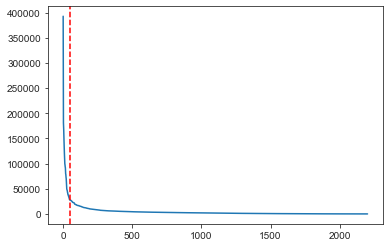

In [44]:
x = df5.index
y = df5.importance
plt.plot(x,y)
kl = KneeLocator(x, y, curve="convex", direction="decreasing")
knee = kl.knee
plt.axvline(knee, c='r', ls='--')

In [45]:
knee

50

## 3.3 Find Prioritized Categories by Month

In [46]:
Forward_coverage_positive_1000

,Date,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,L2marker,WholesaleCost,Forecast,Covered Sales,Missed Sales,MissedCount2,MissedCount1,Missed_Sale_amount,Parcel_Effect,Priority_score,cumsum
0,2020-09-01,FUPHA1059,57389,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,262.4875,62596.580848,11339.46,51257.120848,195.274521,238.474521,195.274521,1.5,106176.859432,5.125712e+04
1,2020-09-01,YBYDT1161,3555,Outdoor Decor,Door Mats,Small Parcel,1.0,24.6875,11491.568225,0.00,11491.568225,465.481245,465.481245,465.481245,1.5,87059.539021,2.527463e+05
2,2020-09-01,CXBRH1163,52963,Bath,Bath Towels,Small Parcel,1.0,175.0625,28899.758409,0.00,28899.758409,165.082519,165.082519,165.082519,1.5,68112.015402,8.015688e+04
3,2020-09-01,UFAEK1000,50414,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,216.2500,24864.704380,0.00,24864.704380,114.981292,114.981292,114.981292,1.5,54544.250359,1.050216e+05
4,2020-09-01,CXBRH1159,52963,Bath,Bath Towels,Small Parcel,1.0,114.1625,16027.200751,0.00,16027.200751,140.389364,140.389364,140.389364,1.5,45099.205706,1.622555e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156654,2021-08-01,UFDLL3813,7101,Rugs,Kitchen Mats,Small Parcel,1.0,12.4625,35.690998,0.00,35.690998,2.863871,2.863871,2.863871,1.0,322.078146,1.679802e+07
156655,2021-08-01,CXFA10156,5730,Lighting,Pendant Lights,Small Parcel,1.0,420.0000,260.134185,0.00,260.134185,0.619367,0.619367,0.619367,1.0,322.070895,1.288120e+07
156656,2021-08-01,XCXBR1584,64828,Education,Lockers,Small Parcel,1.0,146.1500,191.227511,0.00,191.227511,1.308433,1.308433,1.308433,1.0,322.070831,1.381974e+07
156657,2021-08-01,LOQWE1006,61190,Lighting,Pendant Lights,Small Parcel,1.0,122.5000,177.319763,0.00,177.319763,1.447508,1.447508,1.447508,1.0,322.070590,1.404054e+07


In [47]:
Forward_coverage_positive_1000 = Forward_coverage_positive_1000.set_index(['Date'], drop=True)

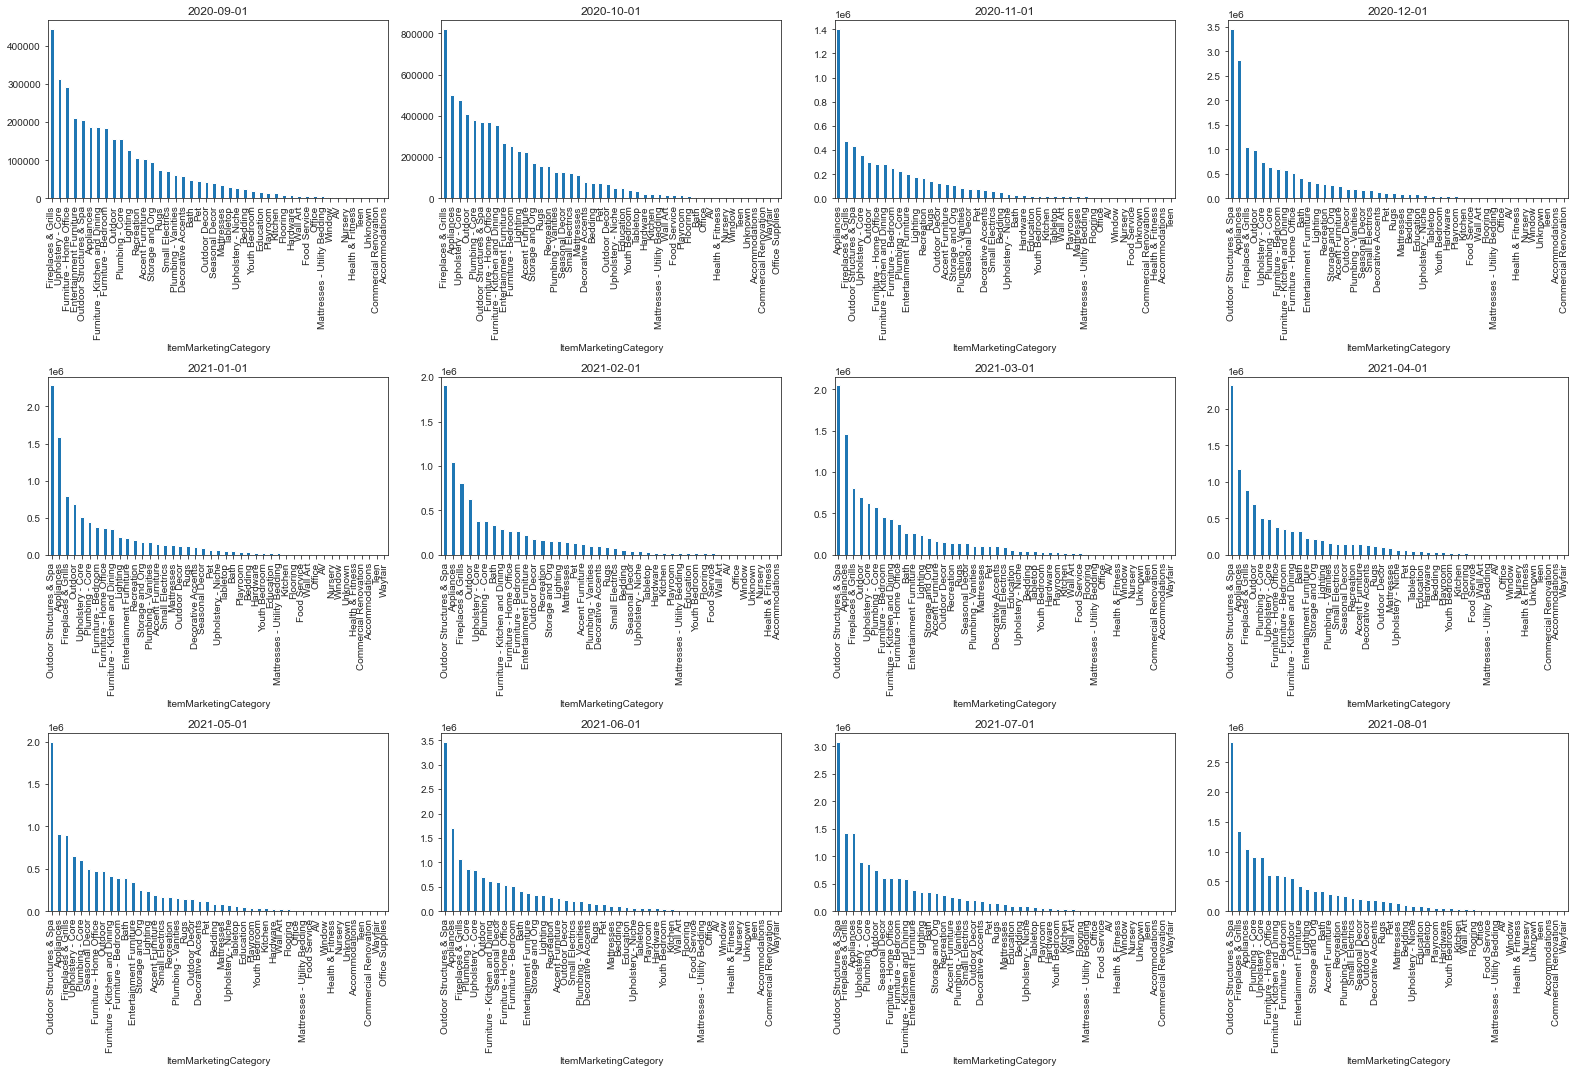

In [48]:
fig, axes = plt.subplots(3, 4, figsize = (22,15))

i = 0
for date in Forward_coverage_positive_1000.index.unique():
    Forward_coverage_positive_1000.loc[date].groupby('ItemMarketingCategory')['Missed Sales'].sum().sort_values(ascending=False).plot.bar(ax=axes[int(i/4)][i%4])
    axes[int(i/4)][i%4].title.set_text(date)
    i += 1
    
    
plt.tight_layout()
fig.savefig(f'../plots/newplot/category vs Missed_Sales.jpg')
plt.show()

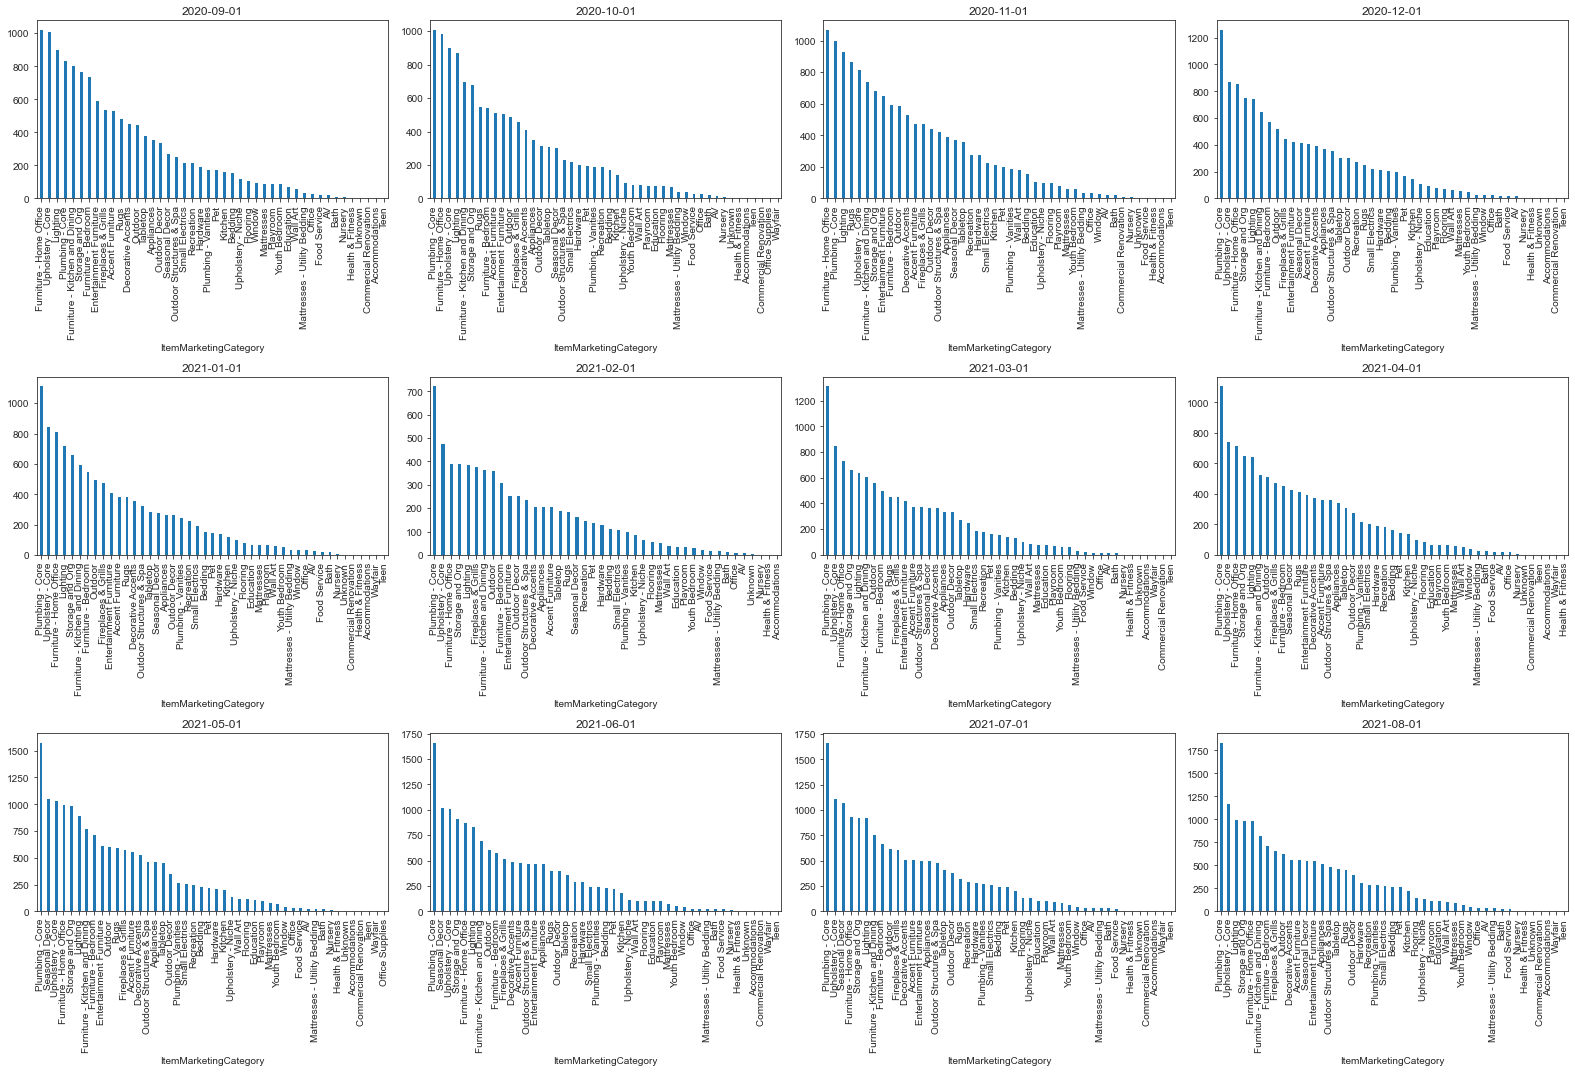

In [49]:
fig, axes = plt.subplots(3, 4, figsize = (22,15))

i = 0
for date in Forward_coverage_positive_1000.index.unique():
    Forward_coverage_positive_1000.loc[date].groupby('ItemMarketingCategory').SKU.count().sort_values(ascending=False).plot.bar(ax=axes[int(i/4)][i%4])
    axes[int(i/4)][i%4].title.set_text(date)
    i += 1
    
    
plt.tight_layout()
fig.savefig(f'../plots/newplot/category vs SKU_count.jpg')
plt.show()

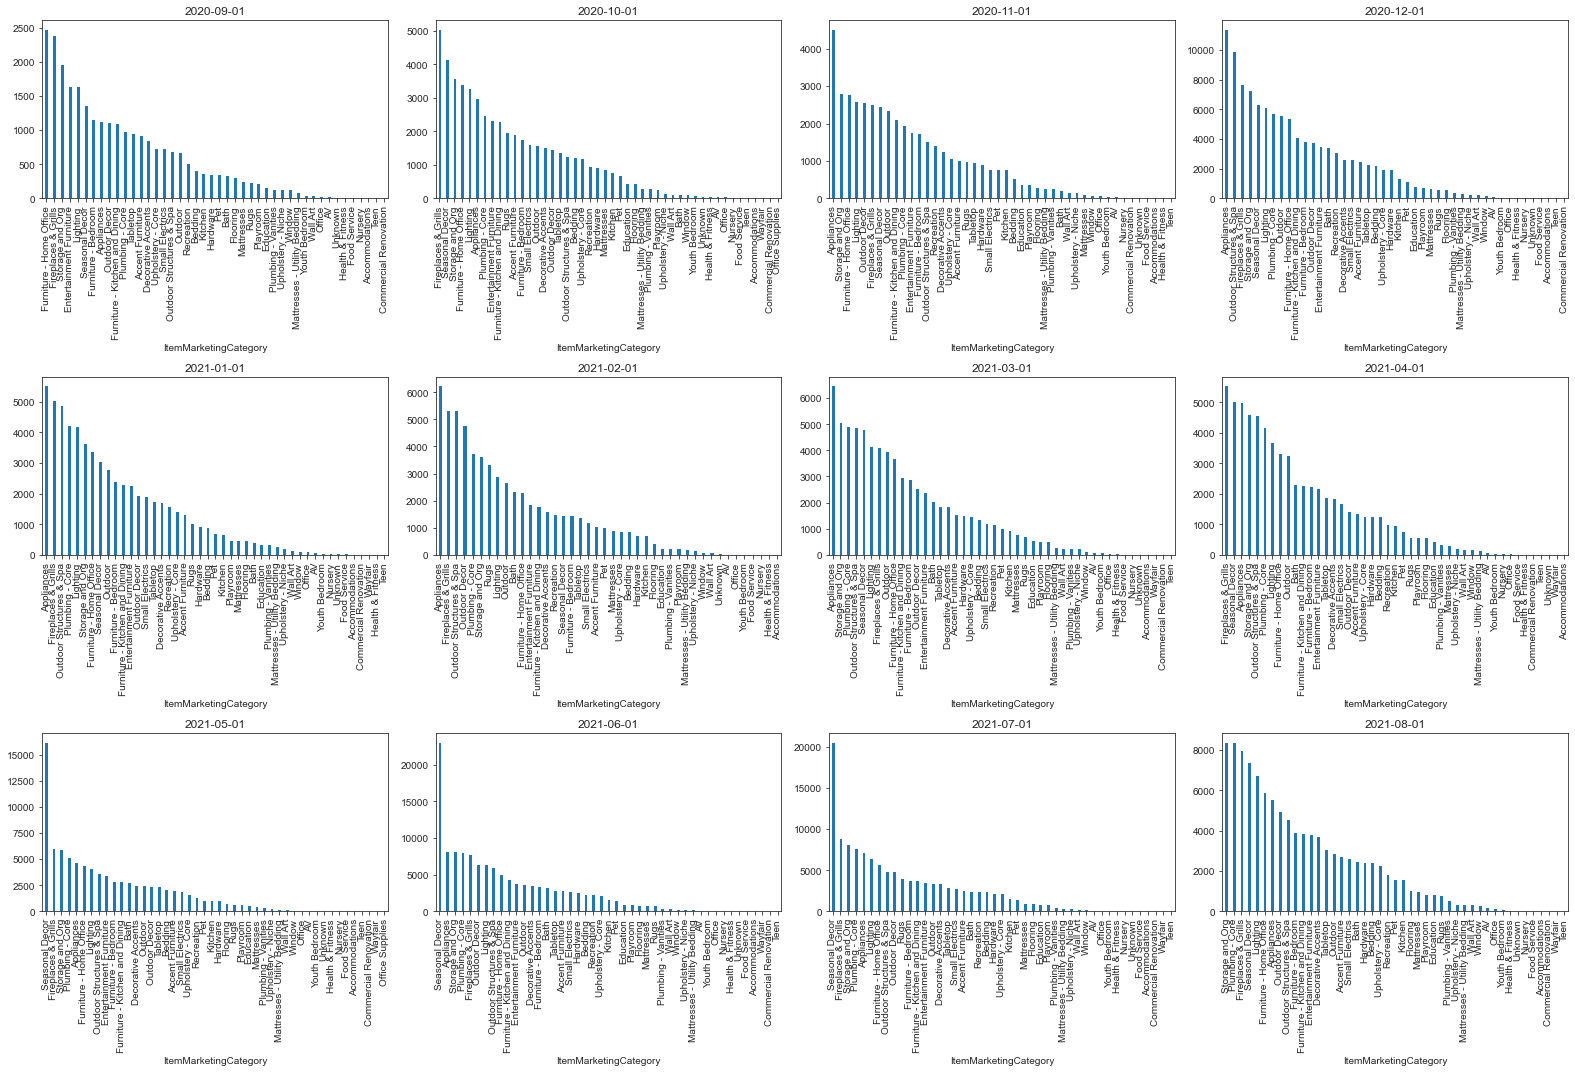

In [50]:
fig, axes = plt.subplots(3, 4, figsize = (22,15))

i = 0
for date in Forward_coverage_positive_1000.index.unique():
    Forward_coverage_positive_1000.loc[date].groupby('ItemMarketingCategory')['Missed_Sale_amount'].sum().sort_values(ascending=False).plot.bar(ax=axes[int(i/4)][i%4])
    axes[int(i/4)][i%4].title.set_text(date)
    i += 1
       
plt.tight_layout()
fig.savefig(f'../plots/newplot/category vs Missed_Sale_amount.jpg')
plt.show()

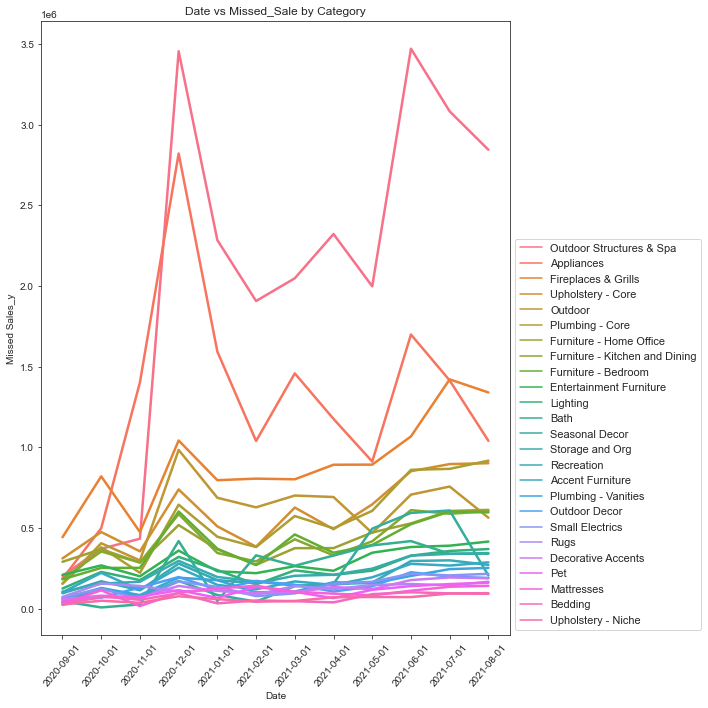

In [51]:
a1 = Forward_coverage_positive_1000.groupby(['ItemMarketingCategory'])['Missed Sales'].sum().sort_values(ascending = False).head(25)
a1.reset_index()
b1 = pd.DataFrame(Forward_coverage_positive_1000.groupby(['ItemMarketingCategory','Date'])['Missed Sales'].sum())
b1 = b1.reset_index()
c1 = pd.merge(a1,b1, on = 'ItemMarketingCategory', how = 'inner')

fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.lineplot(x = 'Date', y ='Missed Sales_y', hue="ItemMarketingCategory", data=c1, linewidth=2.5, ax=ax)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.xticks(rotation=50)
plt.title('Date vs Missed_Sale by Category')
plt.tight_layout()
fig.savefig(f'../plots/newplot/date vs Missed_Sale by category.png')

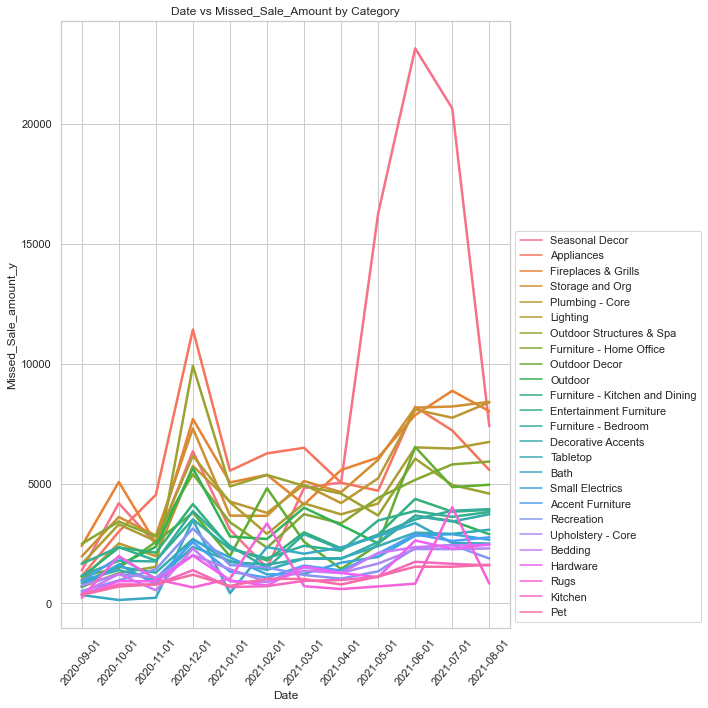

In [52]:
a2 = Forward_coverage_positive_1000.groupby(['ItemMarketingCategory'])['Missed_Sale_amount'].sum().sort_values(ascending = False).head(25)
a2=a2.reset_index()
b2 = pd.DataFrame(Forward_coverage_positive_1000.groupby(['ItemMarketingCategory','Date'])['Missed_Sale_amount'].sum())
b2 = b2.reset_index()
c2 = pd.merge(a2,b2, on = 'ItemMarketingCategory', how = 'inner')

fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.lineplot(x = 'Date', y ='Missed_Sale_amount_y', hue="ItemMarketingCategory", data=c2, linewidth=2.5, ax=ax)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.xticks(rotation=50)
plt.title('Date vs Missed_Sale_Amount by Category')
plt.tight_layout()
fig.savefig(f'../plots/newplot/date vs Missed_Sale_amount by category.png')

## 

In [53]:
c2.sort_values(by = ['ItemMarketingCategory', 'Date'])

,ItemMarketingCategory,Missed_Sale_amount_x,Date,Missed_Sale_amount_y
204,Accent Furniture,22088.897815,2020-09-01,923.301016
205,Accent Furniture,22088.897815,2020-10-01,1922.929354
206,Accent Furniture,22088.897815,2020-11-01,1034.832643
207,Accent Furniture,22088.897815,2020-12-01,2551.832234
208,Accent Furniture,22088.897815,2021-01-01,1327.470170
209,Accent Furniture,22088.897815,2021-02-01,1069.790722
210,Accent Furniture,22088.897815,2021-03-01,1574.728764
211,Accent Furniture,22088.897815,2021-04-01,1373.668490
212,Accent Furniture,22088.897815,2021-05-01,2073.706896
213,Accent Furniture,22088.897815,2021-06-01,2878.381610


In [54]:
c3 = c2.sort_values(by = ['ItemMarketingCategory', 'Date']).set_index('ItemMarketingCategory')
c3

,Missed_Sale_amount_x,Date,Missed_Sale_amount_y
ItemMarketingCategory,,,
Accent Furniture,22088.897815,2020-09-01,923.301016
Accent Furniture,22088.897815,2020-10-01,1922.929354
Accent Furniture,22088.897815,2020-11-01,1034.832643
Accent Furniture,22088.897815,2020-12-01,2551.832234
Accent Furniture,22088.897815,2021-01-01,1327.470170
Accent Furniture,22088.897815,2021-02-01,1069.790722
Accent Furniture,22088.897815,2021-03-01,1574.728764
Accent Furniture,22088.897815,2021-04-01,1373.668490
Accent Furniture,22088.897815,2021-05-01,2073.706896


In [55]:
np.unique(c2.sort_values(by = ['ItemMarketingCategory', 'Date'])['ItemMarketingCategory'].values)

array(['Accent Furniture', 'Appliances', 'Bath', 'Bedding',
       'Decorative Accents', 'Entertainment Furniture',
       'Fireplaces & Grills', 'Furniture - Bedroom',
       'Furniture - Home Office', 'Furniture - Kitchen and Dining',
       'Hardware', 'Kitchen', 'Lighting', 'Outdoor', 'Outdoor Decor',
       'Outdoor Structures & Spa', 'Pet', 'Plumbing - Core', 'Recreation',
       'Rugs', 'Seasonal Decor', 'Small Electrics', 'Storage and Org',
       'Tabletop', 'Upholstery - Core'], dtype=object)

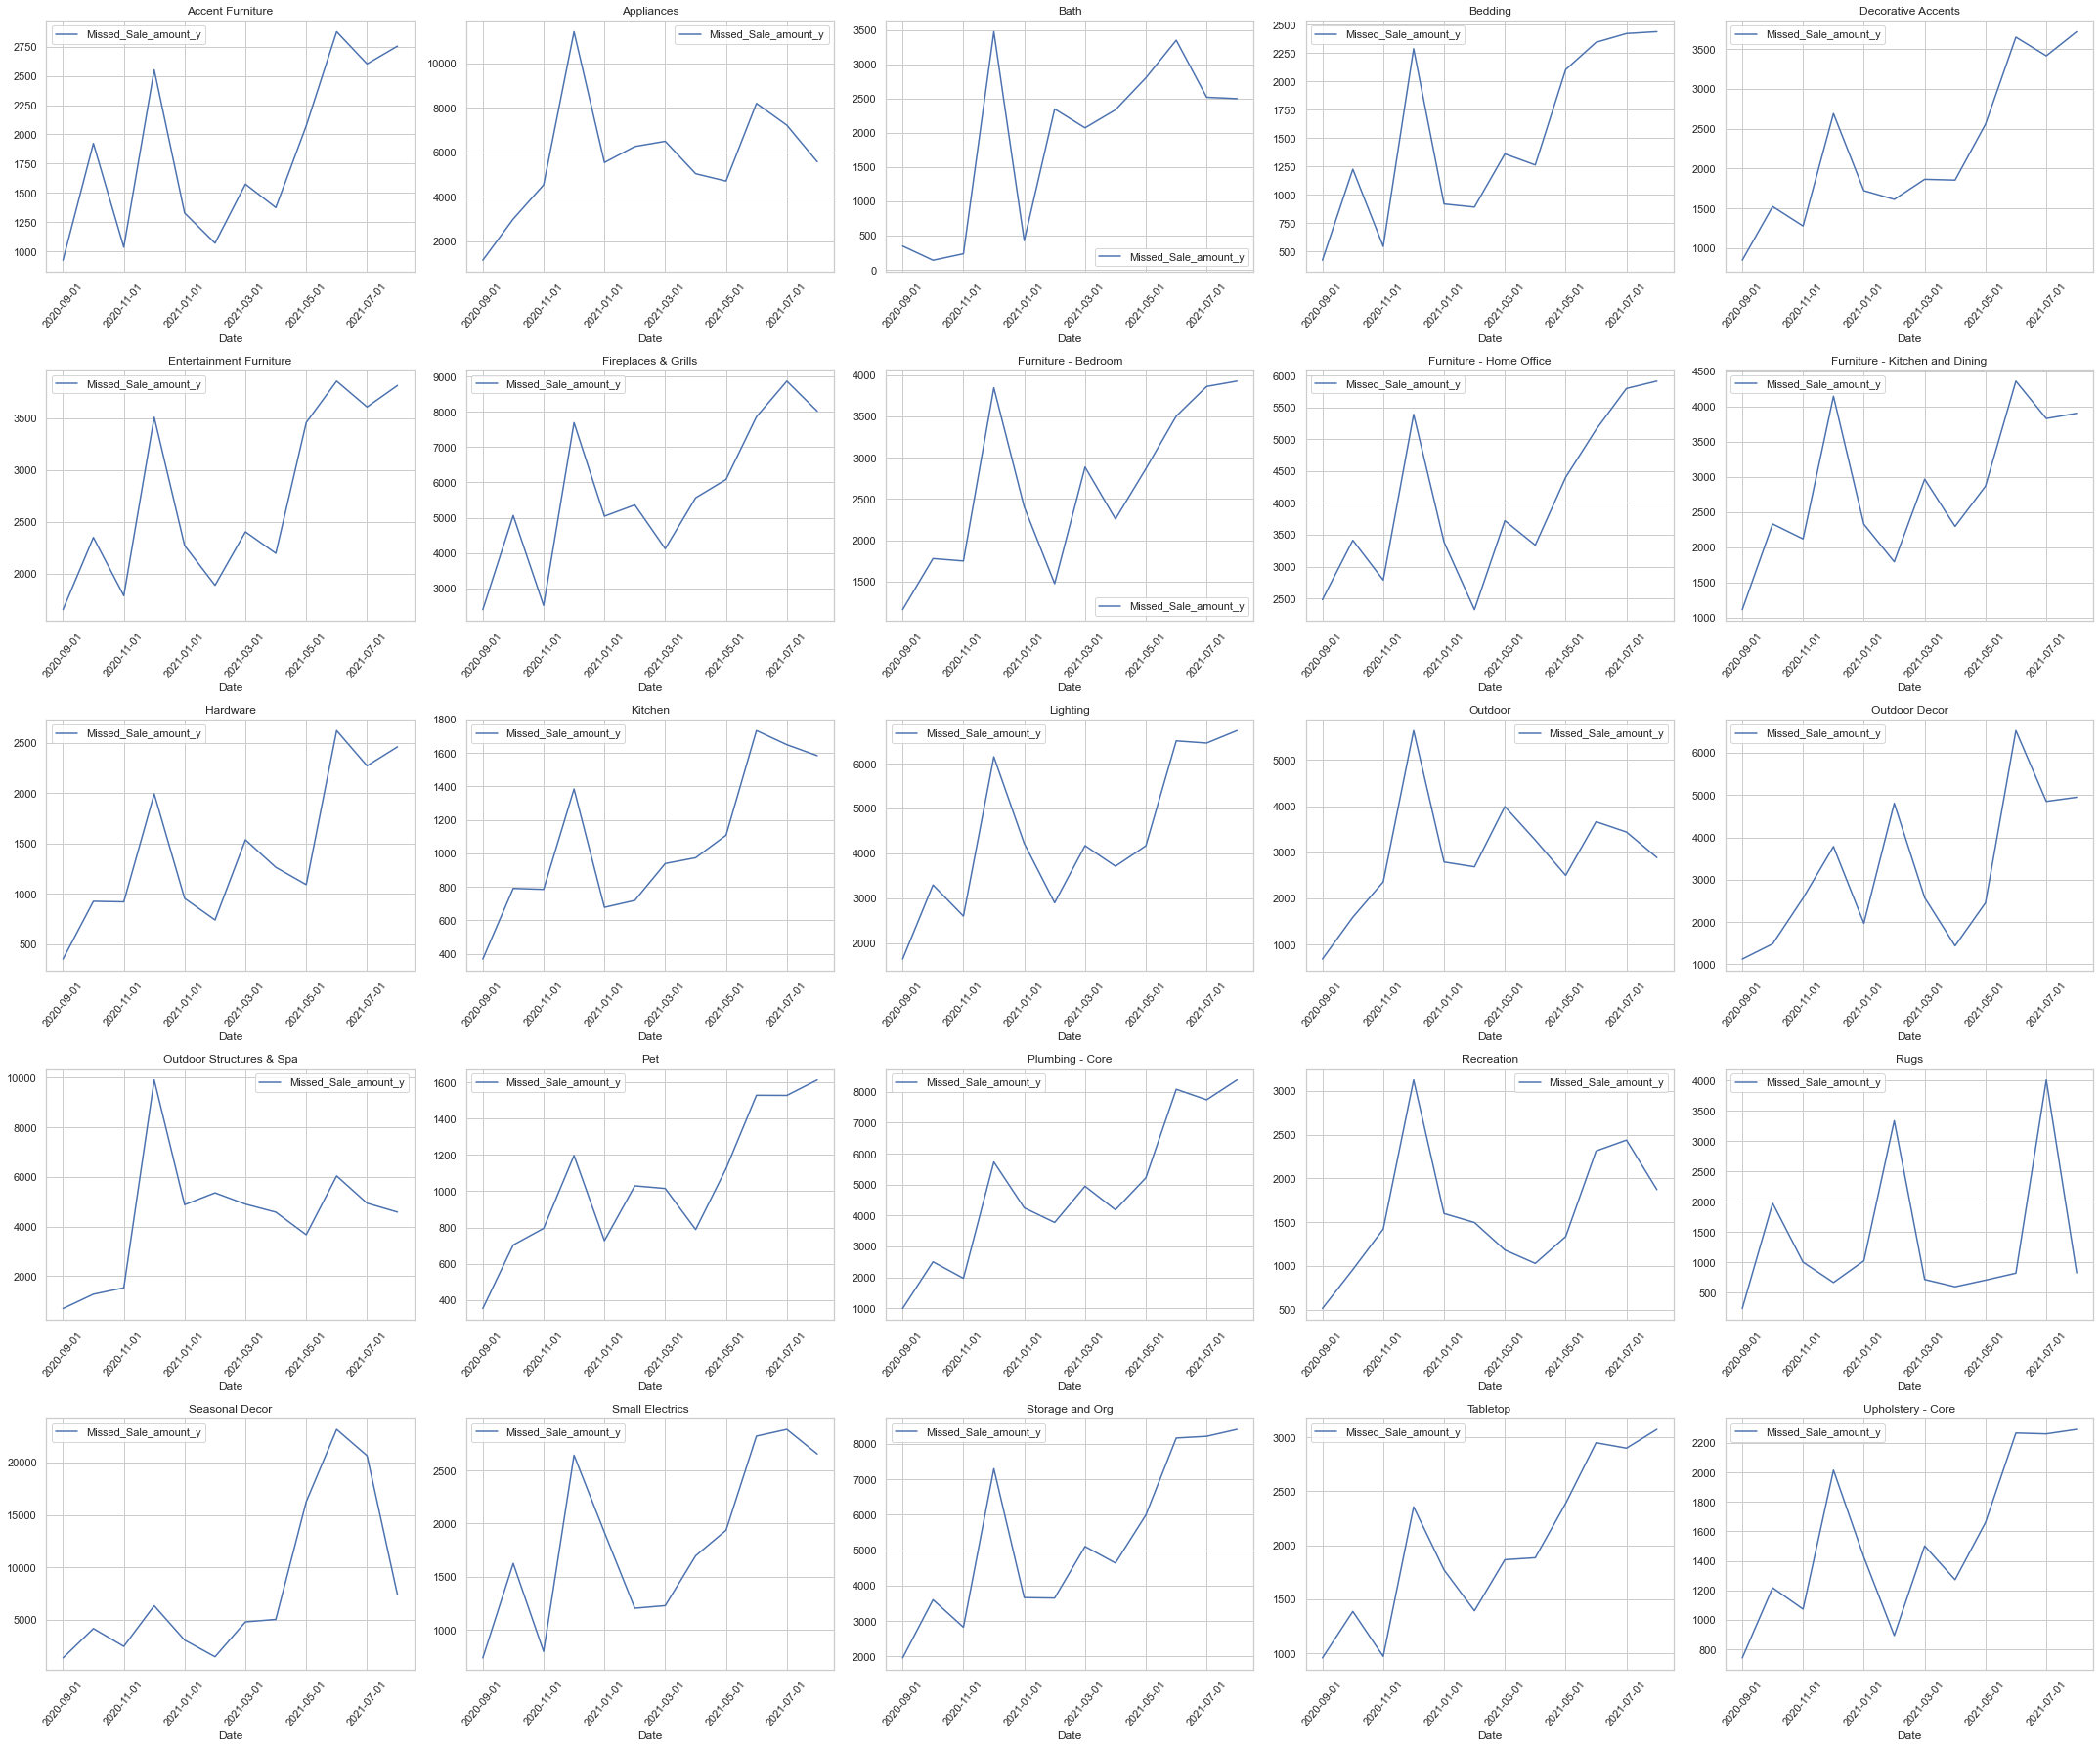

In [56]:
fig, axes = plt.subplots(5, 5, figsize = (30,25))

n = 0
for i in c3.index.unique():
    c3.loc[i].plot(x = 'Date', y ='Missed_Sale_amount_y', ax=axes[int(n/5)][n%5])
    axes[int(n/5)][n%5].title.set_text(i)
    #axes[int(n/5)][n%5].tickparams(axis = 'Date', labelrotation = 50 )
    #set_xticklabels(labels = axes[int(n/5)][n%5].get_xticks,rotation=50)
    axes[int(n/5)][n%5].set_xticklabels(axes[int(n/5)][n%5].get_xticklabels(), rotation=50)
    n += 1
plt.tight_layout()


In [57]:
pd.DataFrame(c2.sort_values(by = ['ItemMarketingCategory', 'Date']).groupby(by = ['ItemMarketingCategory']))

,0,1
0,Accent Furniture,ItemMarketingCategory Missed_Sale_amount_...
1,Appliances,ItemMarketingCategory Missed_Sale_amount_x...
2,Bath,ItemMarketingCategory Missed_Sale_amount_...
3,Bedding,ItemMarketingCategory Missed_Sale_amount_...
4,Decorative Accents,ItemMarketingCategory Missed_Sale_amount_...
5,Entertainment Furniture,ItemMarketingCategory Missed_Sale_amou...
6,Fireplaces & Grills,ItemMarketingCategory Missed_Sale_amount_x...
7,Furniture - Bedroom,ItemMarketingCategory Missed_Sale_amount_...
8,Furniture - Home Office,ItemMarketingCategory Missed_Sale_amoun...
9,Furniture - Kitchen and Dining,ItemMarketingCategory Missed_Sa...


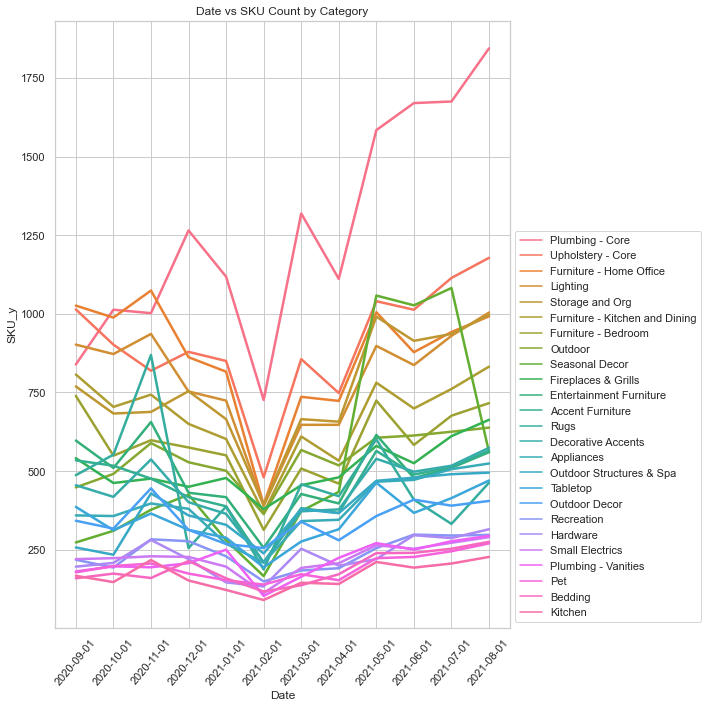

In [58]:
a3 = Forward_coverage_positive_1000.groupby(['ItemMarketingCategory'])['SKU'].count().sort_values(ascending = False).head(25)
a3.reset_index()
b3 = pd.DataFrame(Forward_coverage_positive_1000.groupby(['ItemMarketingCategory','Date'])['SKU'].count())
b3 = b3.reset_index()
c3 = pd.merge(a3,b3, on = 'ItemMarketingCategory', how = 'inner')

fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.lineplot(x = 'Date', y ='SKU_y', hue="ItemMarketingCategory", data=c3, linewidth=2.5, ax=ax)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.xticks(rotation=50)
plt.title('Date vs SKU Count by Category')
plt.tight_layout()
fig.savefig(f'../plots/newplot/date vs SKU count by category.png')

## 3.4 Opportunity Size

### 3.4.1 Opportunity Size by Month Measured by Cumulative Missed Value

In [59]:
Forward_coverage_positive_1000.reset_index()

,Date,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,L2marker,WholesaleCost,Forecast,Covered Sales,Missed Sales,MissedCount2,MissedCount1,Missed_Sale_amount,Parcel_Effect,Priority_score,cumsum
0,2020-09-01,FUPHA1059,57389,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,262.4875,62596.580848,11339.46,51257.120848,195.274521,238.474521,195.274521,1.5,106176.859432,5.125712e+04
1,2020-09-01,YBYDT1161,3555,Outdoor Decor,Door Mats,Small Parcel,1.0,24.6875,11491.568225,0.00,11491.568225,465.481245,465.481245,465.481245,1.5,87059.539021,2.527463e+05
2,2020-09-01,CXBRH1163,52963,Bath,Bath Towels,Small Parcel,1.0,175.0625,28899.758409,0.00,28899.758409,165.082519,165.082519,165.082519,1.5,68112.015402,8.015688e+04
3,2020-09-01,UFAEK1000,50414,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,216.2500,24864.704380,0.00,24864.704380,114.981292,114.981292,114.981292,1.5,54544.250359,1.050216e+05
4,2020-09-01,CXBRH1159,52963,Bath,Bath Towels,Small Parcel,1.0,114.1625,16027.200751,0.00,16027.200751,140.389364,140.389364,140.389364,1.5,45099.205706,1.622555e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156654,2021-08-01,UFDLL3813,7101,Rugs,Kitchen Mats,Small Parcel,1.0,12.4625,35.690998,0.00,35.690998,2.863871,2.863871,2.863871,1.0,322.078146,1.679802e+07
156655,2021-08-01,CXFA10156,5730,Lighting,Pendant Lights,Small Parcel,1.0,420.0000,260.134185,0.00,260.134185,0.619367,0.619367,0.619367,1.0,322.070895,1.288120e+07
156656,2021-08-01,XCXBR1584,64828,Education,Lockers,Small Parcel,1.0,146.1500,191.227511,0.00,191.227511,1.308433,1.308433,1.308433,1.0,322.070831,1.381974e+07
156657,2021-08-01,LOQWE1006,61190,Lighting,Pendant Lights,Small Parcel,1.0,122.5000,177.319763,0.00,177.319763,1.447508,1.447508,1.447508,1.0,322.070590,1.404054e+07


In [60]:
Forward_coverage_positive_1000.reset_index().groupby('Date').tail(1).set_index('Date', drop = True)

,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,L2marker,WholesaleCost,Forecast,Covered Sales,Missed Sales,MissedCount2,MissedCount1,Missed_Sale_amount,Parcel_Effect,Priority_score,cumsum
Date,,,,,,,,,,,,,,,,
2020-09-01,YBRGX1045,49291,Wall Art,Wall Art,Small Parcel,1.0,337.4375,70.374178,0.0,70.374178,0.208555,0.208555,0.208555,1.5,136.844473,3.381768e+06
2020-10-01,CXBAZ1009,65701,Storage and Org,Cabinet Organization,Small Parcel,1.0,3.9500,7.529754,0.0,7.529754,1.906267,1.906267,1.906267,1.5,297.234662,7.632779e+06
2020-11-01,TGRWY1062,44572,Upholstery - Core,Living Room Sets,Large Parcel,1.0,7140.0000,118.273477,0.0,118.273477,0.016565,0.016565,0.016565,1.0,119.929968,5.388914e+06
2020-12-01,NMWLZ1137,64607,Lighting,Chandeliers,Small Parcel,1.0,203.7500,264.599151,0.0,264.599151,1.298646,1.298646,1.298646,1.0,394.463765,1.487909e+07
2021-01-01,IRBTS1252,46013,Flooring,Floor & Wall Tile,Large Parcel,1.0,65.0000,101.186853,0.0,101.186853,1.556721,1.556721,1.556721,1.0,256.858935,1.035493e+07
2021-02-01,OLNSC1199,69607,Fireplaces & Grills,Outdoor Fireplaces,Small Parcel,1.0,249.9875,252.347042,0.0,252.347042,1.009439,1.009439,1.009439,1.0,353.290906,8.148685e+06
2021-03-01,NMRE1033,18227,Outdoor,Furniture Covers,Small Parcel,1.0,37.3375,79.001708,0.0,79.001708,2.115881,2.115881,2.115881,1.0,290.589812,1.119178e+07
2021-04-01,YBUEL2439,58368,Upholstery - Core,Sectionals,Small Parcel,1.0,556.2500,220.258091,0.0,220.258091,0.395970,0.395970,0.395970,1.0,259.855051,9.344181e+06
2021-05-01,UFBXH5317,1593,Rugs,One-of-a-Kind Rugs,Small Parcel,1.0,94.0875,113.135898,0.0,113.135898,1.202454,1.202454,1.202454,1.0,233.381306,1.066913e+07


### 3.4.2 Opportunity Size by Year Measured by Cumulative Missed Value

In [61]:
Forward_coverage_positive_1000.reset_index().groupby('Date').tail(1)['cumsum'].sum() # 78312008.52286872 

132101366.71467808

<AxesSubplot:xlabel='Missed Sales', ylabel='Priority_score'>

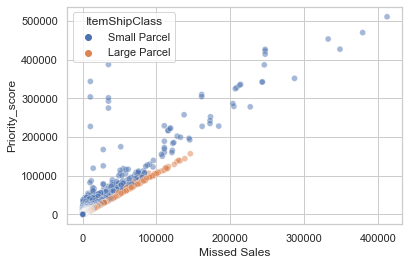

In [62]:
# to test if we had include those special SKUs. low missed value, but high demand. 
sns.scatterplot(x='Missed Sales', y='Priority_score', data=Forward_coverage_positive_1000, alpha = 0.5, hue="ItemShipClass", linewidths=0)

# 4. Visualization

## 4.2 Visualize the sku based strategy performance

In [63]:
tot_forecast_coverage = Forward_coverage_positive.groupby(by=['Date'])['Forecast','Covered Sales'].sum().reset_index()
tot_forecast_coverage

<ipython-input-63-0be008c30887>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tot_forecast_coverage = Forward_coverage_positive.groupby(by=['Date'])['Forecast','Covered Sales'].sum().reset_index()


,Date,Forecast,Covered Sales
0,2020-09-01,4.520618e+06,261034.658936
1,2020-10-01,8.283735e+06,518119.602362
2,2020-11-01,6.869800e+06,230313.381708
3,2020-12-01,2.007565e+07,821567.892029
4,2021-01-01,1.207900e+07,369569.069003
5,2021-02-01,1.099829e+07,561154.577514
6,2021-03-01,1.270602e+07,336921.905560
7,2021-04-01,1.200821e+07,248789.885020
8,2021-05-01,1.293703e+07,332173.627933
9,2021-06-01,1.915270e+07,470654.278531


In [64]:
Forward_coverage_positive_1000

,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,L2marker,WholesaleCost,Forecast,Covered Sales,Missed Sales,MissedCount2,MissedCount1,Missed_Sale_amount,Parcel_Effect,Priority_score,cumsum
Date,,,,,,,,,,,,,,,,
2020-09-01,FUPHA1059,57389,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,262.4875,62596.580848,11339.46,51257.120848,195.274521,238.474521,195.274521,1.5,106176.859432,5.125712e+04
2020-09-01,YBYDT1161,3555,Outdoor Decor,Door Mats,Small Parcel,1.0,24.6875,11491.568225,0.00,11491.568225,465.481245,465.481245,465.481245,1.5,87059.539021,2.527463e+05
2020-09-01,CXBRH1163,52963,Bath,Bath Towels,Small Parcel,1.0,175.0625,28899.758409,0.00,28899.758409,165.082519,165.082519,165.082519,1.5,68112.015402,8.015688e+04
2020-09-01,UFAEK1000,50414,Fireplaces & Grills,Patio Heaters,Small Parcel,1.0,216.2500,24864.704380,0.00,24864.704380,114.981292,114.981292,114.981292,1.5,54544.250359,1.050216e+05
2020-09-01,CXBRH1159,52963,Bath,Bath Towels,Small Parcel,1.0,114.1625,16027.200751,0.00,16027.200751,140.389364,140.389364,140.389364,1.5,45099.205706,1.622555e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,UFDLL3813,7101,Rugs,Kitchen Mats,Small Parcel,1.0,12.4625,35.690998,0.00,35.690998,2.863871,2.863871,2.863871,1.0,322.078146,1.679802e+07
2021-08-01,CXFA10156,5730,Lighting,Pendant Lights,Small Parcel,1.0,420.0000,260.134185,0.00,260.134185,0.619367,0.619367,0.619367,1.0,322.070895,1.288120e+07
2021-08-01,XCXBR1584,64828,Education,Lockers,Small Parcel,1.0,146.1500,191.227511,0.00,191.227511,1.308433,1.308433,1.308433,1.0,322.070831,1.381974e+07


In [65]:
tot_sku = Forward_coverage_positive_1000.reset_index().groupby('Date')['Date','cumsum'].tail(1).reset_index(drop=True)

<ipython-input-65-ff04c3761cd0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tot_sku = Forward_coverage_positive_1000.reset_index().groupby('Date')['Date','cumsum'].tail(1).reset_index(drop=True)


In [66]:
tot_sku

,Date,cumsum
0,2020-09-01,3.381768e+06
1,2020-10-01,7.632779e+06
2,2020-11-01,5.388914e+06
3,2020-12-01,1.487909e+07
4,2021-01-01,1.035493e+07
5,2021-02-01,8.148685e+06
6,2021-03-01,1.119178e+07
7,2021-04-01,9.344181e+06
8,2021-05-01,1.066913e+07
9,2021-06-01,1.776906e+07


In [67]:
improved_sku = tot_forecast_coverage.merge(tot_sku, on = 'Date')
improved_sku

,Date,Forecast,Covered Sales,cumsum
0,2020-09-01,4.520618e+06,261034.658936,3.381768e+06
1,2020-10-01,8.283735e+06,518119.602362,7.632779e+06
2,2020-11-01,6.869800e+06,230313.381708,5.388914e+06
3,2020-12-01,2.007565e+07,821567.892029,1.487909e+07
4,2021-01-01,1.207900e+07,369569.069003,1.035493e+07
5,2021-02-01,1.099829e+07,561154.577514,8.148685e+06
6,2021-03-01,1.270602e+07,336921.905560,1.119178e+07
7,2021-04-01,1.200821e+07,248789.885020,9.344181e+06
8,2021-05-01,1.293703e+07,332173.627933,1.066913e+07
9,2021-06-01,1.915270e+07,470654.278531,1.776906e+07


In [68]:
improved_sku['after_coverage']=improved_sku['Covered Sales']+improved_sku['cumsum']
improved_sku

,Date,Forecast,Covered Sales,cumsum,after_coverage
0,2020-09-01,4.520618e+06,261034.658936,3.381768e+06,3.642803e+06
1,2020-10-01,8.283735e+06,518119.602362,7.632779e+06,8.150899e+06
2,2020-11-01,6.869800e+06,230313.381708,5.388914e+06,5.619227e+06
3,2020-12-01,2.007565e+07,821567.892029,1.487909e+07,1.570066e+07
4,2021-01-01,1.207900e+07,369569.069003,1.035493e+07,1.072450e+07
5,2021-02-01,1.099829e+07,561154.577514,8.148685e+06,8.709840e+06
6,2021-03-01,1.270602e+07,336921.905560,1.119178e+07,1.152871e+07
7,2021-04-01,1.200821e+07,248789.885020,9.344181e+06,9.592971e+06
8,2021-05-01,1.293703e+07,332173.627933,1.066913e+07,1.100131e+07
9,2021-06-01,1.915270e+07,470654.278531,1.776906e+07,1.823971e+07


In [69]:
# improved_sku['%'] = improved_sku['cumsum']/improved_sku['Forecast']
# improved_sku.mean()

In [70]:
new_improved_sku = improved_sku[['Forecast','Covered Sales','after_coverage']]
new_improved_sku

,Forecast,Covered Sales,after_coverage
0,4.520618e+06,261034.658936,3.642803e+06
1,8.283735e+06,518119.602362,8.150899e+06
2,6.869800e+06,230313.381708,5.619227e+06
3,2.007565e+07,821567.892029,1.570066e+07
4,1.207900e+07,369569.069003,1.072450e+07
5,1.099829e+07,561154.577514,8.709840e+06
6,1.270602e+07,336921.905560,1.152871e+07
7,1.200821e+07,248789.885020,9.592971e+06
8,1.293703e+07,332173.627933,1.100131e+07
9,1.915270e+07,470654.278531,1.823971e+07


In [71]:
new_improved_sku

,Forecast,Covered Sales,after_coverage
0,4.520618e+06,261034.658936,3.642803e+06
1,8.283735e+06,518119.602362,8.150899e+06
2,6.869800e+06,230313.381708,5.619227e+06
3,2.007565e+07,821567.892029,1.570066e+07
4,1.207900e+07,369569.069003,1.072450e+07
5,1.099829e+07,561154.577514,8.709840e+06
6,1.270602e+07,336921.905560,1.152871e+07
7,1.200821e+07,248789.885020,9.592971e+06
8,1.293703e+07,332173.627933,1.100131e+07
9,1.915270e+07,470654.278531,1.823971e+07


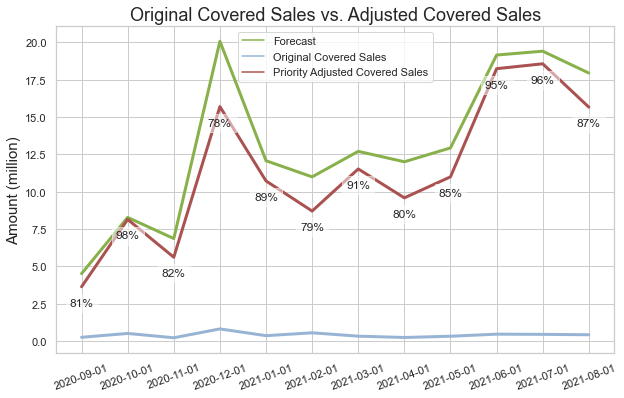

In [72]:
plt.close()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

sns.lineplot(data=new_improved_sku/1e6, ax=ax, palette=['#88B04B', '#98B4D4', '#AA5251'], linewidth=3, dashes=False)

for i in range(12):
    perc = new_improved_sku.after_coverage.iloc[i]/new_improved_sku.Forecast.iloc[i]*100
    ax.text(i, new_improved_sku.after_coverage.iloc[i]/1e6-0.75, f'{perc:.0f}%', ha='center', va='top', bbox={'facecolor':'w', 'alpha':0.5})

ax.set_ylabel('Amount (million)',fontsize= 15)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(dates, rotation=20)
L=plt.legend()
L.get_texts()[1].set_text('Original Covered Sales')
L.get_texts()[2].set_text('Priority Adjusted Covered Sales')
plt.title('Original Covered Sales vs. Adjusted Covered Sales', fontsize= 18)
fig.savefig(f'../plots/newplot/SKU_SelectionResult.png')

Text(0.5, 1.0, 'Prioritized SKU Count vs. Total SKU Count')

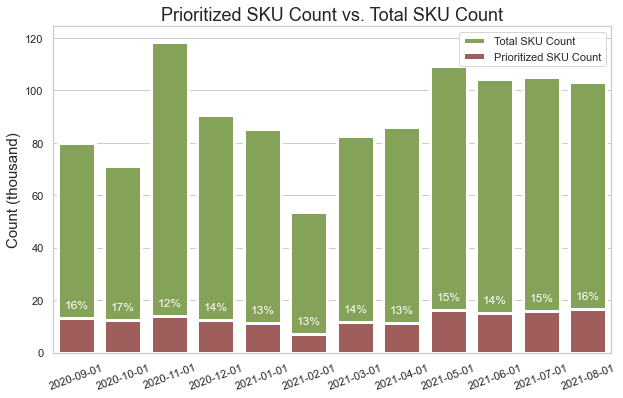

In [73]:
plt.close()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.barplot(data=merge1/1e3, x=merge1.index, y='SKU count', color='#88B04B', linewidth=3, ax=ax, label="SKU count")
sns.barplot(data=merge1/1e3, x=merge1.index, y='Prioritized SKU count', color='#AA5251', linewidth=3, ax=ax, label="Prioritized SKU count")

for i in range(12):
    perc = merge1['Prioritized SKU count'].iloc[i]/merge1['SKU count'].iloc[i]*100
    ax.text(i, merge1['Prioritized SKU count'].iloc[i]/1e3+3, f'{perc:.0f}%', ha='center', va='bottom', color='w')
    
ax.set_ylabel('Count (thousand)', fontsize= 15)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(dates, rotation=20)
L=plt.legend()
L.get_texts()[0].set_text('Total SKU Count')
L.get_texts()[1].set_text('Prioritized SKU Count')
plt.title('Prioritized SKU Count vs. Total SKU Count', fontsize= 18)

Text(0.5, 1.0, 'Prioritized SKU Count vs. Total SKU Count')

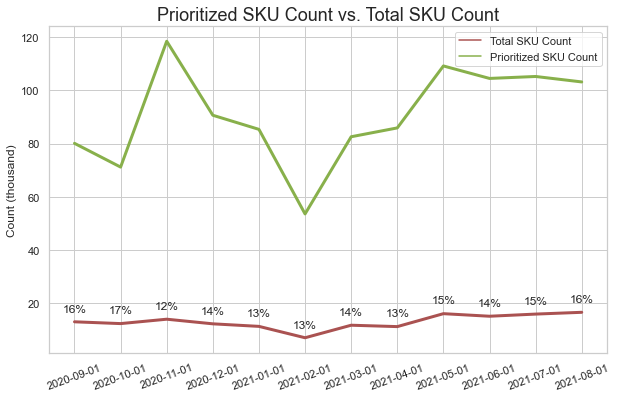

In [74]:
plt.close()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.lineplot(data=merge1[['Prioritized SKU count', 'SKU count']]/1e3, ax=ax, palette=[ '#AA5251','#88B04B'], linewidth=3, dashes=False)

for i in range(12):
    perc = merge1['Prioritized SKU count'].iloc[i]/merge1['SKU count'].iloc[i]*100
    ax.text(i, merge1['Prioritized SKU count'].iloc[i]/1e3+3, f'{perc:.0f}%', ha='center', va='bottom')
    
ax.set_ylabel('Count (thousand)')
ax.set_xticks(np.arange(12))
ax.set_xticklabels(dates, rotation=20)
L=plt.legend()
L.get_texts()[0].set_text('Total SKU Count')
L.get_texts()[1].set_text('Prioritized SKU Count')
plt.title('Prioritized SKU Count vs. Total SKU Count', fontsize= 18)
#fig.savefig(f'../plots/newplot/SKU_SelectionResult.png')

# 5. Substitution Strategy

## 5.1

In [75]:
Forward_coverage_df_final = Forward_coverage_df_final.drop('Forward Coverage %', axis =1)
Forward_coverage_df_final

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score
21071,2020-09-01,FUPHA1059,57389,Patio Heaters,Fireplaces & Grills,Small Parcel,62596.580848,262.4875,11339.460000,51257.120848,5.125712e+04,195.274521,70784.572955
5238,2020-09-01,CXBRH1163,52963,Bath Towels,Bath,Small Parcel,28899.758409,175.0625,0.000000,28899.758409,8.015688e+04,165.082519,45408.010268
86033,2020-09-01,UFAEK1000,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,24864.704380,216.2500,0.000000,24864.704380,1.050216e+05,114.981292,36362.833572
138610,2020-09-01,ZATAT1069,34638,Air Conditioners,Appliances,Small Parcel,20722.065062,304.0875,0.000000,20722.065062,1.257436e+05,68.145074,27536.572420
16376,2020-09-01,EVRKG9112,37882,Outdoor Conversation Sets,Outdoor,Small Parcel,20484.621761,300.0000,0.000000,20484.621761,1.462283e+05,68.282073,27312.829015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514714,2021-08-01,OLKJP1062,35624,Canopies & Gazebos,Outdoor Structures & Spa,Small Parcel,1725.675878,282.5000,4671.002377,-2945.326499,1.702763e+07,-10.425935,-3987.919950
1543028,2021-08-01,UFAEK1001,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,14556.517073,247.5000,17511.599486,-2955.082413,1.702467e+07,-11.939727,-4149.055105
1573139,2021-08-01,XCBFX1203,33417,Air Conditioners,Appliances,Small Parcel,1853.511756,342.1250,5017.024301,-3163.512546,1.702151e+07,-9.246657,-4088.178251
1561310,2021-08-01,WDBP10007,657,Deck Boxes,Outdoor Structures & Spa,Small Parcel,1362.962087,45.0000,6017.886444,-4654.924357,1.701685e+07,-103.442763,-14999.200707


In [76]:
Forward_coverage_negative = Forward_coverage_df_final.loc[Forward_coverage_df_final['Missed Sales'] < 0].loc[Forward_coverage_df_final['Forecast'] > 0].loc[Forward_coverage_df_final['WholesaleCost'] > 0]
Forward_coverage_negative

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score
60359,2020-09-01,OLLMT1363,50772,Flooring Samples,Flooring,Small Parcel,0.000705,0.0250,0.000795,-0.000090,4.259584e+06,-0.003603,-0.360394
22751,2020-09-01,GTCPI1086,14365,Flooring Samples,Flooring,Small Parcel,0.000705,0.0125,0.000795,-0.000090,4.259584e+06,-0.007207,-0.720823
60360,2020-09-01,OLLMT1364,50772,Flooring Samples,Flooring,Small Parcel,0.001410,0.0250,0.001590,-0.000180,4.259584e+06,-0.007207,-0.720913
60361,2020-09-01,OLLMT1366,50772,Flooring Samples,Flooring,Small Parcel,0.001410,0.0250,0.001590,-0.000180,4.259584e+06,-0.007207,-0.720913
60373,2020-09-01,OLLMT1434,50772,Flooring Samples,Flooring,Small Parcel,0.001410,0.0250,0.001590,-0.000180,4.259584e+06,-0.007207,-0.720913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514714,2021-08-01,OLKJP1062,35624,Canopies & Gazebos,Outdoor Structures & Spa,Small Parcel,1725.675878,282.5000,4671.002377,-2945.326499,1.702763e+07,-10.425935,-3987.919950
1543028,2021-08-01,UFAEK1001,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,14556.517073,247.5000,17511.599486,-2955.082413,1.702467e+07,-11.939727,-4149.055105
1573139,2021-08-01,XCBFX1203,33417,Air Conditioners,Appliances,Small Parcel,1853.511756,342.1250,5017.024301,-3163.512546,1.702151e+07,-9.246657,-4088.178251
1561310,2021-08-01,WDBP10007,657,Deck Boxes,Outdoor Structures & Spa,Small Parcel,1362.962087,45.0000,6017.886444,-4654.924357,1.701685e+07,-103.442763,-14999.200707


In [77]:
Forward_coverage_negative.SKU.nunique()

71460

In [78]:
Forward_coverage_negative.groupby('Date')['Missed_Sale_amount'].mean()

Date
2020-09-01   -0.142051
2020-10-01   -0.361282
2020-11-01   -0.110670
2020-12-01   -0.465598
2021-01-01   -0.206796
2021-02-01   -0.250606
2021-03-01   -0.201350
2021-04-01   -0.120068
2021-05-01   -0.145658
2021-06-01   -0.228918
2021-07-01   -0.195858
2021-08-01   -0.164442
Name: Missed_Sale_amount, dtype: float64

In [79]:
Forward_coverage_negative.groupby('Date')['SKU'].count()

Date
2020-09-01    59697
2020-10-01    33874
2020-11-01    59678
2020-12-01    41156
2021-01-01    38319
2021-02-01    23930
2021-03-01    35546
2021-04-01    39615
2021-05-01    43926
2021-06-01    40634
2021-07-01    40274
2021-08-01    38634
Name: SKU, dtype: int64

In [80]:
Forward_coverage_positive = Forward_coverage_df_final.loc[Forward_coverage_df_final['Missed Sales'] > 0].loc[Forward_coverage_df_final['Forecast'] > 0].loc[Forward_coverage_df_final['WholesaleCost'] > 0]
Forward_coverage_positive #1090054

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score
21071,2020-09-01,FUPHA1059,57389,Patio Heaters,Fireplaces & Grills,Small Parcel,62596.580848,262.4875,11339.460000,51257.120848,5.125712e+04,195.274521,70784.572955
5238,2020-09-01,CXBRH1163,52963,Bath Towels,Bath,Small Parcel,28899.758409,175.0625,0.000000,28899.758409,8.015688e+04,165.082519,45408.010268
86033,2020-09-01,UFAEK1000,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,24864.704380,216.2500,0.000000,24864.704380,1.050216e+05,114.981292,36362.833572
138610,2020-09-01,ZATAT1069,34638,Air Conditioners,Appliances,Small Parcel,20722.065062,304.0875,0.000000,20722.065062,1.257436e+05,68.145074,27536.572420
16376,2020-09-01,EVRKG9112,37882,Outdoor Conversation Sets,Outdoor,Small Parcel,20484.621761,300.0000,0.000000,20484.621761,1.462283e+05,68.282073,27312.829015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476202,2021-08-01,FUINT2191,21763,Cooking Utensils,Kitchen,Small Parcel,0.485479,1.7750,0.479507,0.005971,1.751486e+07,0.003364,0.342380
1478012,2021-08-01,GTCPI1086,14365,Flooring Samples,Flooring,Small Parcel,0.005923,0.0125,0.000000,0.005923,1.751486e+07,0.473843,47.390234
1464387,2021-08-01,DWAME1438,53216,Lawn and Beach Chairs,Outdoor,Small Parcel,0.005072,58.1250,0.000000,0.005072,1.751486e+07,0.000087,0.013799
1565854,2021-08-01,WDOSJ1537,40408,Mugs & Teacups,Tabletop,Small Parcel,1.120429,8.1000,1.117305,0.003125,1.751486e+07,0.000386,0.041699


In [81]:
Forward_coverage_positive.groupby(['Date','SKU']).any().reset_index()#1087736 rows

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score
0,2020-09-01,AZASA1001,True,True,True,True,True,True,False,True,True,True,True
1,2020-09-01,AZASA1003,True,True,True,True,True,True,False,True,True,True,True
2,2020-09-01,AZASA1020,True,True,True,True,True,True,False,True,True,True,True
3,2020-09-01,AZAZ10001,True,True,True,True,True,True,False,True,True,True,True
4,2020-09-01,AZAZ10002,True,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087731,2021-08-01,ZAZZM2208,True,True,True,True,True,True,False,True,True,True,True
1087732,2021-08-01,ZAZZM2209,True,True,True,True,True,True,False,True,True,True,True
1087733,2021-08-01,ZAZZM2210,True,True,True,True,True,True,False,True,True,True,True
1087734,2021-08-01,ZAZZM2211,True,True,True,True,True,True,False,True,True,True,True


In [82]:
Forward_coverage_positive.duplicated(subset=['Date','SKU'], keep=False)

21071      False
5238       False
86033      False
138610     False
16376      False
           ...  
1476202    False
1478012    False
1464387    False
1565854    False
1565199    False
Length: 1090054, dtype: bool

In [83]:
# bug!!
Forward_coverage_positive[Forward_coverage_positive.duplicated(subset=['Date','SKU'], keep=False)].sort_values(by = ['Date','SKU'])#2318

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score
3493,2020-09-01,BYLGF1069,59907,Sectionals,Upholstery - Core,Small Parcel,455.141759,623.7500,0.0,455.141759,2.004419e+06,0.729686,528.110377
3492,2020-09-01,BYLGF1069,59907,Sectionals,Upholstery - Core,Large Parcel,132.264000,623.7500,0.0,132.264000,2.937201e+06,0.212046,153.468649
6786,2020-09-01,CXJT10008,49230,Benches,Accent Furniture,Large Parcel,19.941930,319.9000,0.0,19.941930,3.972648e+06,0.062338,26.175732
6787,2020-09-01,CXJT10008,49230,Benches,Accent Furniture,Small Parcel,3.077923,176.5250,0.0,3.077923,4.229673e+06,0.017436,4.821541
6799,2020-09-01,CXJT10030,49230,Accent Chairs,Upholstery - Core,Large Parcel,50.891612,465.6875,0.0,50.891612,3.576417e+06,0.109283,61.819887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595602,2021-08-01,ZARGD1648,27167,Area Rugs,Rugs,Small Parcel,28.411665,189.7500,0.0,28.411665,1.703568e+07,0.149732,43.384874
1595939,2021-08-01,ZASD10423,13897,Bathroom Sinks,Plumbing - Core,Large Parcel,176.949864,251.4375,0.0,176.949864,1.412262e+07,0.703753,247.325151
1595940,2021-08-01,ZASD10423,13897,Bathroom Sinks,Plumbing - Core,Small Parcel,25.035850,314.4375,0.0,25.035850,1.710583e+07,0.079621,32.997957
1596071,2021-08-01,ZASD10705,13897,Shower Bases,Plumbing - Core,Small Parcel,135.213195,548.4375,0.0,135.213195,1.483509e+07,0.246543,159.867453


In [84]:
# wuhan_agg_data = pd.read_csv('../data/combined_dataset_aggregated_0325.csv')
# wuhan_agg_data.loc[wuhan_agg_data['MissedDemand'] < 0]

In [85]:
Forward_coverage_positive_1000 = Forward_coverage_positive_1000.drop(['L2marker','MissedCount1','MissedCount2','Parcel_Effect'],axis = 1).reset_index()
Forward_coverage_positive_1000

,Date,SKU,suid,ItemMarketingCategory,ItemClass,ItemShipClass,WholesaleCost,Forecast,Covered Sales,Missed Sales,Missed_Sale_amount,Priority_score,cumsum
0,2020-09-01,FUPHA1059,57389,Fireplaces & Grills,Patio Heaters,Small Parcel,262.4875,62596.580848,11339.46,51257.120848,195.274521,106176.859432,5.125712e+04
1,2020-09-01,YBYDT1161,3555,Outdoor Decor,Door Mats,Small Parcel,24.6875,11491.568225,0.00,11491.568225,465.481245,87059.539021,2.527463e+05
2,2020-09-01,CXBRH1163,52963,Bath,Bath Towels,Small Parcel,175.0625,28899.758409,0.00,28899.758409,165.082519,68112.015402,8.015688e+04
3,2020-09-01,UFAEK1000,50414,Fireplaces & Grills,Patio Heaters,Small Parcel,216.2500,24864.704380,0.00,24864.704380,114.981292,54544.250359,1.050216e+05
4,2020-09-01,CXBRH1159,52963,Bath,Bath Towels,Small Parcel,114.1625,16027.200751,0.00,16027.200751,140.389364,45099.205706,1.622555e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156654,2021-08-01,UFDLL3813,7101,Rugs,Kitchen Mats,Small Parcel,12.4625,35.690998,0.00,35.690998,2.863871,322.078146,1.679802e+07
156655,2021-08-01,CXFA10156,5730,Lighting,Pendant Lights,Small Parcel,420.0000,260.134185,0.00,260.134185,0.619367,322.070895,1.288120e+07
156656,2021-08-01,XCXBR1584,64828,Education,Lockers,Small Parcel,146.1500,191.227511,0.00,191.227511,1.308433,322.070831,1.381974e+07
156657,2021-08-01,LOQWE1006,61190,Lighting,Pendant Lights,Small Parcel,122.5000,177.319763,0.00,177.319763,1.447508,322.070590,1.404054e+07


In [86]:
item_push_to_df = pd.concat([Forward_coverage_positive,Forward_coverage_positive_1000]).drop_duplicates(subset = ['Date',"SKU", 'suid','ItemMarketingCategory','ItemClass','ItemShipClass','WholesaleCost','Forecast'], keep=False)
item_push_to_df

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score
5235,2020-09-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,16027.200751,114.1625,0.000000,16027.200751,1.622555e+05,140.389364,30066.137137
92821,2020-09-01,VEAMD1234,2010,Dehumidifiers,Appliances,Small Parcel,12944.838539,228.7375,0.000000,12944.838539,2.161122e+05,56.592551,18604.093598
44071,2020-09-01,KPTO1038,919,Crock Pots & Slow Cookers,Small Electrics,Small Parcel,6449.542378,87.9750,0.000000,6449.542378,3.422852e+05,73.311081,13780.650509
65518,2020-09-01,PKNDT1007,53520,Exercise Pens and Yard Kennels,Pet,Small Parcel,5772.349322,174.9875,0.000000,5772.349322,3.963920e+05,32.987209,9071.070272
44042,2020-09-01,KPTO10009,919,Crock Pots & Slow Cookers,Small Electrics,Small Parcel,4845.175030,94.2250,0.000000,4845.175030,4.853092e+05,51.421332,9987.308254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156627,2021-08-01,SHBL10132,5638,Outdoor Sinks & Bar Centers,Fireplaces & Grills,Small Parcel,269.738279,510.7750,0.000000,269.738279,1.277472e+07,0.528096,322.547888
156628,2021-08-01,HSCSH1949,58573,Rocking Chairs,Accent Furniture,Small Parcel,214.568507,198.7375,0.000000,214.568507,1.347295e+07,1.079658,322.534295
156630,2021-08-01,FUDGV1122,57537,Outdoor Conversation Sets,Outdoor,Small Parcel,283.912332,735.6375,0.000000,283.912332,1.262172e+07,0.385941,322.506386
156649,2021-08-01,MNDPF1131,21423,"Towel Bars, Racks, and Stands",Plumbing - Core,Small Parcel,156.740672,70.7125,56.231358,100.509314,1.540969e+07,2.216591,322.168387


In [87]:
item_push_to_df['forecast n_items'] = item_push_to_df['Forecast'] / item_push_to_df['WholesaleCost'] 
item_push_to_df['Covered Sales n_items'] = item_push_to_df['Covered Sales'] / item_push_to_df['WholesaleCost'] 
item_push_to_df['Missed Sales n_items'] = item_push_to_df['Missed Sales'] / item_push_to_df['WholesaleCost'] 
item_push_to_df

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score,forecast n_items,Covered Sales n_items,Missed Sales n_items
5235,2020-09-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,16027.200751,114.1625,0.000000,16027.200751,1.622555e+05,140.389364,30066.137137,140.389364,0.000000,140.389364
92821,2020-09-01,VEAMD1234,2010,Dehumidifiers,Appliances,Small Parcel,12944.838539,228.7375,0.000000,12944.838539,2.161122e+05,56.592551,18604.093598,56.592551,0.000000,56.592551
44071,2020-09-01,KPTO1038,919,Crock Pots & Slow Cookers,Small Electrics,Small Parcel,6449.542378,87.9750,0.000000,6449.542378,3.422852e+05,73.311081,13780.650509,73.311081,0.000000,73.311081
65518,2020-09-01,PKNDT1007,53520,Exercise Pens and Yard Kennels,Pet,Small Parcel,5772.349322,174.9875,0.000000,5772.349322,3.963920e+05,32.987209,9071.070272,32.987209,0.000000,32.987209
44042,2020-09-01,KPTO10009,919,Crock Pots & Slow Cookers,Small Electrics,Small Parcel,4845.175030,94.2250,0.000000,4845.175030,4.853092e+05,51.421332,9987.308254,51.421332,0.000000,51.421332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156627,2021-08-01,SHBL10132,5638,Outdoor Sinks & Bar Centers,Fireplaces & Grills,Small Parcel,269.738279,510.7750,0.000000,269.738279,1.277472e+07,0.528096,322.547888,0.528096,0.000000,0.528096
156628,2021-08-01,HSCSH1949,58573,Rocking Chairs,Accent Furniture,Small Parcel,214.568507,198.7375,0.000000,214.568507,1.347295e+07,1.079658,322.534295,1.079658,0.000000,1.079658
156630,2021-08-01,FUDGV1122,57537,Outdoor Conversation Sets,Outdoor,Small Parcel,283.912332,735.6375,0.000000,283.912332,1.262172e+07,0.385941,322.506386,0.385941,0.000000,0.385941
156649,2021-08-01,MNDPF1131,21423,"Towel Bars, Racks, and Stands",Plumbing - Core,Small Parcel,156.740672,70.7125,56.231358,100.509314,1.540969e+07,2.216591,322.168387,2.216591,0.795211,1.421380


In [88]:
item_push_to_df.SKU.nunique()

140740

In [89]:
item_push_to_df.groupby('Date')['SKU'].count()

Date
2020-09-01     70131
2020-10-01     61875
2020-11-01    107634
2020-12-01     81550
2021-01-01     76741
2021-02-01     48239
2021-03-01     73706
2021-04-01     77436
2021-05-01     97325
2021-06-01     93582
2021-07-01     93608
2021-08-01     90832
Name: SKU, dtype: int64

In [90]:
item_push_to_df.groupby('Date')['Missed Sales'].mean()

Date
2020-09-01    20.754817
2020-10-01    44.313310
2020-11-01    17.098743
2020-12-01    88.007012
2021-01-01    52.070667
2021-02-01    89.364610
2021-03-01    53.710981
2021-04-01    49.550924
2021-05-01    47.074638
2021-06-01    73.828723
2021-07-01    76.252110
2021-08-01    74.768063
Name: Missed Sales, dtype: float64

In [91]:
Forward_coverage_negative

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score
60359,2020-09-01,OLLMT1363,50772,Flooring Samples,Flooring,Small Parcel,0.000705,0.0250,0.000795,-0.000090,4.259584e+06,-0.003603,-0.360394
22751,2020-09-01,GTCPI1086,14365,Flooring Samples,Flooring,Small Parcel,0.000705,0.0125,0.000795,-0.000090,4.259584e+06,-0.007207,-0.720823
60360,2020-09-01,OLLMT1364,50772,Flooring Samples,Flooring,Small Parcel,0.001410,0.0250,0.001590,-0.000180,4.259584e+06,-0.007207,-0.720913
60361,2020-09-01,OLLMT1366,50772,Flooring Samples,Flooring,Small Parcel,0.001410,0.0250,0.001590,-0.000180,4.259584e+06,-0.007207,-0.720913
60373,2020-09-01,OLLMT1434,50772,Flooring Samples,Flooring,Small Parcel,0.001410,0.0250,0.001590,-0.000180,4.259584e+06,-0.007207,-0.720913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514714,2021-08-01,OLKJP1062,35624,Canopies & Gazebos,Outdoor Structures & Spa,Small Parcel,1725.675878,282.5000,4671.002377,-2945.326499,1.702763e+07,-10.425935,-3987.919950
1543028,2021-08-01,UFAEK1001,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,14556.517073,247.5000,17511.599486,-2955.082413,1.702467e+07,-11.939727,-4149.055105
1573139,2021-08-01,XCBFX1203,33417,Air Conditioners,Appliances,Small Parcel,1853.511756,342.1250,5017.024301,-3163.512546,1.702151e+07,-9.246657,-4088.178251
1561310,2021-08-01,WDBP10007,657,Deck Boxes,Outdoor Structures & Spa,Small Parcel,1362.962087,45.0000,6017.886444,-4654.924357,1.701685e+07,-103.442763,-14999.200707


In [92]:
Forward_coverage_negative.SKU.nunique()

71460

In [93]:
item_push_from_df = Forward_coverage_negative
item_push_from_df['forecast n_items'] = item_push_from_df['Forecast'] / item_push_from_df['WholesaleCost'] 
item_push_from_df['Covered Sales n_items'] = item_push_from_df['Covered Sales'] / item_push_from_df['WholesaleCost'] 
item_push_from_df['Missed Sales n_items'] = item_push_from_df['Missed Sales'] / item_push_from_df['WholesaleCost'] 
item_push_from_df = item_push_from_df.loc[item_push_from_df['Missed Sales'] < -50] # add a cutoff value # 50: 20178
item_push_from_df

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score,forecast n_items,Covered Sales n_items,Missed Sales n_items
60037,2020-09-01,OLKJP2619,35624,Canopies & Gazebos,Outdoor Structures & Spa,Large Parcel,29.317938,873.7500,79.356826,-50.038887,4.028778e+06,-0.057269,-55.765798,0.033554,0.090823,-0.057269
124926,2020-09-01,XCZVF1108,64644,Makeup Vanities,Furniture - Bedroom,Small Parcel,391.502244,142.5000,441.543884,-50.041640,4.028728e+06,-0.351169,-85.158581,2.747384,3.098554,-0.351169
102877,2020-09-01,WDBHM7895,34734,Bath Towels,Bath,Small Parcel,29.354232,62.5000,79.455065,-50.100833,4.028677e+06,-0.801613,-130.262166,0.469668,1.271281,-0.801613
39867,2020-09-01,JQZ12938,47015,Outdoor Wall Lights,Lighting,Small Parcel,29.366105,30.3750,79.487201,-50.121096,4.028627e+06,-1.650077,-215.128821,0.966785,2.616863,-1.650077
128636,2020-09-01,YBHAF1011,64532,Desks,Furniture - Home Office,Small Parcel,392.220611,149.9875,442.354073,-50.133462,4.028577e+06,-0.334251,-83.558555,2.615022,2.949273,-0.334251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514714,2021-08-01,OLKJP1062,35624,Canopies & Gazebos,Outdoor Structures & Spa,Small Parcel,1725.675878,282.5000,4671.002377,-2945.326499,1.702763e+07,-10.425935,-3987.919950,6.108587,16.534522,-10.425935
1543028,2021-08-01,UFAEK1001,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,14556.517073,247.5000,17511.599486,-2955.082413,1.702467e+07,-11.939727,-4149.055105,58.814210,70.753937,-11.939727
1573139,2021-08-01,XCBFX1203,33417,Air Conditioners,Appliances,Small Parcel,1853.511756,342.1250,5017.024301,-3163.512546,1.702151e+07,-9.246657,-4088.178251,5.417645,14.664302,-9.246657
1561310,2021-08-01,WDBP10007,657,Deck Boxes,Outdoor Structures & Spa,Small Parcel,1362.962087,45.0000,6017.886444,-4654.924357,1.701685e+07,-103.442763,-14999.200707,30.288046,133.730810,-103.442763


In [94]:
item_push_from_df.SKU.nunique()

6024

In [95]:
recommendation_df = item_push_to_df.merge(item_push_from_df[['Date', 'ItemClass', 'SKU', 'suid', 'WholesaleCost', 'Missed Sales', 'forecast n_items','Covered Sales n_items','Missed Sales n_items']], on=['Date', 'ItemClass'])
recommendation_df

,Date,SKU_x,suid_x,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost_x,Covered Sales,Missed Sales_x,...,forecast n_items_x,Covered Sales n_items_x,Missed Sales n_items_x,SKU_y,suid_y,WholesaleCost_y,Missed Sales_y,forecast n_items_y,Covered Sales n_items_y,Missed Sales n_items_y
0,2020-09-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,16027.200751,114.162500,0.000000,16027.200751,...,140.389364,0.00000,140.389364,WDBHM7895,34734,62.50000,-50.100833,0.469668,1.271281,-0.801613
1,2020-09-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,16027.200751,114.162500,0.000000,16027.200751,...,140.389364,0.00000,140.389364,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
2,2020-09-01,SHHCL5726,41180,Bath Towels,Bath,Small Parcel,63.198121,29.975000,0.000000,63.198121,...,2.108361,0.00000,2.108361,WDBHM7895,34734,62.50000,-50.100833,0.469668,1.271281,-0.801613
3,2020-09-01,SHHCL5726,41180,Bath Towels,Bath,Small Parcel,63.198121,29.975000,0.000000,63.198121,...,2.108361,0.00000,2.108361,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
4,2020-09-01,CXBRH1157,52963,Bath Towels,Bath,Small Parcel,39.956053,205.087500,0.000000,39.956053,...,0.194824,0.00000,0.194824,WDBHM7895,34734,62.50000,-50.100833,0.469668,1.271281,-0.801613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178041,2021-08-01,ZAQGI1231,30650,Flatware Serving Pieces,Tabletop,Small Parcel,17.911545,17.083333,17.784256,0.127289,...,1.048481,1.04103,0.007451,NMDPI2936,21095,17.50000,-55.140422,1.846111,4.996992,-3.150881
8178042,2021-08-01,VELLP1016,1691,Egg Tools,Kitchen,Small Parcel,24.322927,16.237500,0.000000,24.322927,...,1.497948,0.00000,1.497948,YBSTN1017,17885,15.62500,-112.534931,4.219812,11.422048,-7.202236
8178043,2021-08-01,ZAIPT1000,71713,Rug Pads,Rugs,Small Parcel,20.167733,13.312500,0.000000,20.167733,...,1.514947,0.00000,1.514947,UFDSR1000,63426,10.06875,-70.473177,4.100852,11.100050,-6.999198
8178044,2021-08-01,ZAIPT1003,71713,Rug Pads,Rugs,Small Parcel,6.304603,6.500000,0.000000,6.304603,...,0.969939,0.00000,0.969939,UFDSR1000,63426,10.06875,-70.473177,4.100852,11.100050,-6.999198


In [96]:
# only recommend items in a similar price range (optional)
recommendation_df = recommendation_df.loc[(recommendation_df['WholesaleCost_x']/recommendation_df['WholesaleCost_y'] > 0.5) & (recommendation_df['WholesaleCost_x']/recommendation_df['WholesaleCost_y'] < 2)]
recommendation_df

,Date,SKU_x,suid_x,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost_x,Covered Sales,Missed Sales_x,...,forecast n_items_x,Covered Sales n_items_x,Missed Sales n_items_x,SKU_y,suid_y,WholesaleCost_y,Missed Sales_y,forecast n_items_y,Covered Sales n_items_y,Missed Sales n_items_y
0,2020-09-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,16027.200751,114.162500,0.000000,16027.200751,...,140.389364,0.00000,140.389364,WDBHM7895,34734,62.50000,-50.100833,0.469668,1.271281,-0.801613
3,2020-09-01,SHHCL5726,41180,Bath Towels,Bath,Small Parcel,63.198121,29.975000,0.000000,63.198121,...,2.108361,0.00000,2.108361,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
8,2020-09-01,CXBRH1121,53377,Bath Towels,Bath,Small Parcel,23.011000,34.600000,0.000000,23.011000,...,0.665058,0.00000,0.665058,WDBHM7895,34734,62.50000,-50.100833,0.469668,1.271281,-0.801613
9,2020-09-01,CXBRH1121,53377,Bath Towels,Bath,Small Parcel,23.011000,34.600000,0.000000,23.011000,...,0.665058,0.00000,0.665058,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
11,2020-09-01,NMCHD1377,38796,Bath Towels,Bath,Small Parcel,20.918176,30.937500,0.000000,20.918176,...,0.676143,0.00000,0.676143,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178038,2021-08-01,EVWB10154,8697,Flatware Serving Pieces,Tabletop,Small Parcel,0.576809,10.625000,0.000000,0.576809,...,0.054288,0.00000,0.054288,NMDPI2936,21095,17.50000,-55.140422,1.846111,4.996992,-3.150881
8178041,2021-08-01,ZAQGI1231,30650,Flatware Serving Pieces,Tabletop,Small Parcel,17.911545,17.083333,17.784256,0.127289,...,1.048481,1.04103,0.007451,NMDPI2936,21095,17.50000,-55.140422,1.846111,4.996992,-3.150881
8178042,2021-08-01,VELLP1016,1691,Egg Tools,Kitchen,Small Parcel,24.322927,16.237500,0.000000,24.322927,...,1.497948,0.00000,1.497948,YBSTN1017,17885,15.62500,-112.534931,4.219812,11.422048,-7.202236
8178043,2021-08-01,ZAIPT1000,71713,Rug Pads,Rugs,Small Parcel,20.167733,13.312500,0.000000,20.167733,...,1.514947,0.00000,1.514947,UFDSR1000,63426,10.06875,-70.473177,4.100852,11.100050,-6.999198


In [97]:
# change instock level for items cannot be pushed and has a lot of instock
item_cannot_push_df = item_push_from_df.loc[~item_push_from_df['SKU'].isin(item_push_to_df.SKU)]
item_cannot_push_df['Missed Sales'].sum()
item_cannot_push_df

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score,forecast n_items,Covered Sales n_items,Missed Sales n_items
124926,2020-09-01,XCZVF1108,64644,Makeup Vanities,Furniture - Bedroom,Small Parcel,391.502244,142.5000,441.543884,-50.041640,4.028728e+06,-0.351169,-85.158581,2.747384,3.098554,-0.351169
102877,2020-09-01,WDBHM7895,34734,Bath Towels,Bath,Small Parcel,29.354232,62.5000,79.455065,-50.100833,4.028677e+06,-0.801613,-130.262166,0.469668,1.271281,-0.801613
128636,2020-09-01,YBHAF1011,64532,Desks,Furniture - Home Office,Small Parcel,392.220611,149.9875,442.354073,-50.133462,4.028577e+06,-0.334251,-83.558555,2.615022,2.949273,-0.334251
30452,2020-09-01,HSNDZ1000,53924,End Tables,Entertainment Furniture,Small Parcel,392.382320,240.0000,442.536451,-50.154131,4.028527e+06,-0.208976,-71.051686,1.634926,1.843902,-0.208976
57420,2020-09-01,NMXIM1076,77303,Indoor Chaise Lounges,Upholstery - Core,Small Parcel,392.435478,312.5000,442.596404,-50.160926,4.028477e+06,-0.160515,-66.212422,1.255794,1.416308,-0.160515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514714,2021-08-01,OLKJP1062,35624,Canopies & Gazebos,Outdoor Structures & Spa,Small Parcel,1725.675878,282.5000,4671.002377,-2945.326499,1.702763e+07,-10.425935,-3987.919950,6.108587,16.534522,-10.425935
1543028,2021-08-01,UFAEK1001,50414,Patio Heaters,Fireplaces & Grills,Small Parcel,14556.517073,247.5000,17511.599486,-2955.082413,1.702467e+07,-11.939727,-4149.055105,58.814210,70.753937,-11.939727
1573139,2021-08-01,XCBFX1203,33417,Air Conditioners,Appliances,Small Parcel,1853.511756,342.1250,5017.024301,-3163.512546,1.702151e+07,-9.246657,-4088.178251,5.417645,14.664302,-9.246657
1561310,2021-08-01,WDBP10007,657,Deck Boxes,Outdoor Structures & Spa,Small Parcel,1362.962087,45.0000,6017.886444,-4654.924357,1.701685e+07,-103.442763,-14999.200707,30.288046,133.730810,-103.442763


In [98]:
17112/495283

0.03454994417333121

In [99]:
item_cannot_push_df.groupby('Date')['Missed_Sale_amount'].mean()

Date
2020-09-01   -2.900930
2020-10-01   -3.304558
2020-11-01   -3.302914
2020-12-01   -3.068730
2021-01-01   -2.823382
2021-02-01   -2.762943
2021-03-01   -2.628589
2021-04-01   -1.731084
2021-05-01   -1.717159
2021-06-01   -2.173790
2021-07-01   -1.757931
2021-08-01   -1.320422
Name: Missed_Sale_amount, dtype: float64

## 5.2. esitmate opportunity size for decreasing customer in-stock gap

### check all sub demand: 

In [100]:
item_push_to_df.sort_values('Missed Sales n_items')
# yes, there are some wierd items that missed 0.007 items. Let ignore this, could be due to the data randomization

,Date,SKU,suid,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost,Covered Sales,Missed Sales,cumsum,Missed_Sale_amount,Priority_score,forecast n_items,Covered Sales n_items,Missed Sales n_items
893473,2021-04-01,DWUW1375,11410,Shower & Tub Doors,Plumbing - Core,Large Parcel,3.211638,289.520833,3.211139,0.000499,1.175942e+07,0.000002,0.000671,0.011093,0.011091,0.000002
331999,2020-11-01,PKOH19264,9632,Fixture Parts And Components,Plumbing - Core,Small Parcel,0.667624,126.807500,0.667129,0.000495,6.639487e+06,0.000004,0.000886,0.005265,0.005261,0.000004
940251,2021-04-01,PKOH19264,9632,Fixture Parts And Components,Plumbing - Core,Small Parcel,1.114284,126.807500,1.113572,0.000712,1.175942e+07,0.000006,0.001274,0.008787,0.008782,0.000006
319934,2020-11-01,OLAJW1054,57966,Accent Chairs,Upholstery - Core,Small Parcel,0.744518,215.625000,0.743046,0.001472,6.639487e+06,0.000007,0.002154,0.003453,0.003446,0.000007
931228,2021-04-01,NMSPG1118,41923,Wall Art,Wall Art,Small Parcel,5.311609,31.875000,5.311200,0.000409,1.175942e+07,0.000013,0.001691,0.166639,0.166626,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92939,2021-05-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,137442.025053,114.162500,0.000000,137442.025053,5.562453e+05,1203.915691,257833.594135,1203.915691,0.000000,1203.915691
109022,2021-06-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,163549.471323,114.162500,0.000000,161311.754378,8.569532e+05,1432.602399,304571.994232,1432.602399,0.000000,1413.001243
39384,2020-12-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,169902.511622,114.162500,0.000000,161311.754378,1.676221e+06,1488.251498,310136.904162,1488.251498,0.000000,1413.001243
1167636,2021-06-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,163549.471323,114.162500,0.000000,163549.471323,9.044551e+05,1432.602399,306809.711177,1432.602399,0.000000,1432.602399


In [101]:
# check tot monthly sub demand result: 
push_to_tot = item_push_to_df.groupby(['Date'])[['Forecast', 'Covered Sales', 'Missed Sales', 'forecast n_items','Covered Sales n_items','Missed Sales n_items']].sum().reset_index()
push_to_tot

,Date,Forecast,Covered Sales,Missed Sales,forecast n_items,Covered Sales n_items,Missed Sales n_items
0,2020-09-01,1.597873e+06,142316.613623,1.455556e+06,15216.244131,1218.574621,13997.669511
1,2020-10-01,2.992709e+06,250822.553924,2.741886e+06,30806.432339,2659.260502,28147.171837
2,2020-11-01,1.923282e+06,82876.182124,1.840406e+06,19736.899086,954.882156,18782.016930
3,2020-12-01,7.584075e+06,398512.852498,7.176972e+06,71109.548670,4066.660685,66967.637730
4,2021-01-01,4.162452e+06,166497.261715,3.995955e+06,35297.893960,1818.474467,33479.419493
5,2021-02-01,4.447319e+06,136459.108262,4.310859e+06,37619.301437,1671.242607,35948.058830
6,2021-03-01,4.129059e+06,170237.905064,3.958822e+06,39979.789625,1912.426466,38067.363159
7,2021-04-01,3.979105e+06,142079.553454,3.837025e+06,39669.012943,1460.123045,38208.889898
8,2021-05-01,4.755117e+06,173577.457085,4.581539e+06,54748.284480,1982.437315,52765.847166
9,2021-06-01,7.198352e+06,287074.243250,6.909040e+06,81850.954295,3414.830977,78416.522162


### Check susbtitute effect:

In [102]:
recommendation_df # has overlaps

,Date,SKU_x,suid_x,ItemClass,ItemMarketingCategory,ItemShipClass,Forecast,WholesaleCost_x,Covered Sales,Missed Sales_x,...,forecast n_items_x,Covered Sales n_items_x,Missed Sales n_items_x,SKU_y,suid_y,WholesaleCost_y,Missed Sales_y,forecast n_items_y,Covered Sales n_items_y,Missed Sales n_items_y
0,2020-09-01,CXBRH1159,52963,Bath Towels,Bath,Small Parcel,16027.200751,114.162500,0.000000,16027.200751,...,140.389364,0.00000,140.389364,WDBHM7895,34734,62.50000,-50.100833,0.469668,1.271281,-0.801613
3,2020-09-01,SHHCL5726,41180,Bath Towels,Bath,Small Parcel,63.198121,29.975000,0.000000,63.198121,...,2.108361,0.00000,2.108361,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
8,2020-09-01,CXBRH1121,53377,Bath Towels,Bath,Small Parcel,23.011000,34.600000,0.000000,23.011000,...,0.665058,0.00000,0.665058,WDBHM7895,34734,62.50000,-50.100833,0.469668,1.271281,-0.801613
9,2020-09-01,CXBRH1121,53377,Bath Towels,Bath,Small Parcel,23.011000,34.600000,0.000000,23.011000,...,0.665058,0.00000,0.665058,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
11,2020-09-01,NMCHD1377,38796,Bath Towels,Bath,Small Parcel,20.918176,30.937500,0.000000,20.918176,...,0.676143,0.00000,0.676143,HSPFG1015,25173,19.98750,-70.947772,27.770455,31.320062,-3.549607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178038,2021-08-01,EVWB10154,8697,Flatware Serving Pieces,Tabletop,Small Parcel,0.576809,10.625000,0.000000,0.576809,...,0.054288,0.00000,0.054288,NMDPI2936,21095,17.50000,-55.140422,1.846111,4.996992,-3.150881
8178041,2021-08-01,ZAQGI1231,30650,Flatware Serving Pieces,Tabletop,Small Parcel,17.911545,17.083333,17.784256,0.127289,...,1.048481,1.04103,0.007451,NMDPI2936,21095,17.50000,-55.140422,1.846111,4.996992,-3.150881
8178042,2021-08-01,VELLP1016,1691,Egg Tools,Kitchen,Small Parcel,24.322927,16.237500,0.000000,24.322927,...,1.497948,0.00000,1.497948,YBSTN1017,17885,15.62500,-112.534931,4.219812,11.422048,-7.202236
8178043,2021-08-01,ZAIPT1000,71713,Rug Pads,Rugs,Small Parcel,20.167733,13.312500,0.000000,20.167733,...,1.514947,0.00000,1.514947,UFDSR1000,63426,10.06875,-70.473177,4.100852,11.100050,-6.999198


In [103]:
sub_effect = recommendation_df.drop_duplicates(subset = ['Date','SKU_y','suid_y','WholesaleCost_y','Missed Sales_y'], keep = 'first').groupby('Date')[['Missed Sales_y','Missed Sales n_items_y']].sum()
sub_effect = sub_effect.reset_index()
sub_effect

,Date,Missed Sales_y,Missed Sales n_items_y
0,2020-09-01,-7.099661e+05,-5095.314477
1,2020-10-01,-1.230214e+06,-8550.735817
2,2020-11-01,-7.450028e+05,-4376.509249
3,2020-12-01,-3.057445e+06,-13443.814588
4,2021-01-01,-9.253823e+05,-4775.636765
5,2021-02-01,-6.127149e+05,-3372.682339
6,2021-03-01,-7.347711e+05,-3827.334960
7,2021-04-01,-2.408272e+05,-1939.745503
8,2021-05-01,-2.332587e+05,-2471.849553
9,2021-06-01,-3.158394e+05,-4142.442203


In [104]:
final_effect = push_to_tot.merge(sub_effect, on = 'Date')
final_effect['value%'] = -final_effect['Missed Sales_y']/final_effect['Missed Sales']
final_effect['count%'] = -final_effect['Missed Sales n_items_y']/final_effect['Missed Sales n_items']
final_effect

,Date,Forecast,Covered Sales,Missed Sales,forecast n_items,Covered Sales n_items,Missed Sales n_items,Missed Sales_y,Missed Sales n_items_y,value%,count%
0,2020-09-01,1.597873e+06,142316.613623,1.455556e+06,15216.244131,1218.574621,13997.669511,-7.099661e+05,-5095.314477,0.487763,0.364012
1,2020-10-01,2.992709e+06,250822.553924,2.741886e+06,30806.432339,2659.260502,28147.171837,-1.230214e+06,-8550.735817,0.448674,0.303787
2,2020-11-01,1.923282e+06,82876.182124,1.840406e+06,19736.899086,954.882156,18782.016930,-7.450028e+05,-4376.509249,0.404803,0.233016
3,2020-12-01,7.584075e+06,398512.852498,7.176972e+06,71109.548670,4066.660685,66967.637730,-3.057445e+06,-13443.814588,0.426008,0.200751
4,2021-01-01,4.162452e+06,166497.261715,3.995955e+06,35297.893960,1818.474467,33479.419493,-9.253823e+05,-4775.636765,0.231580,0.142644
5,2021-02-01,4.447319e+06,136459.108262,4.310859e+06,37619.301437,1671.242607,35948.058830,-6.127149e+05,-3372.682339,0.142133,0.093821
6,2021-03-01,4.129059e+06,170237.905064,3.958822e+06,39979.789625,1912.426466,38067.363159,-7.347711e+05,-3827.334960,0.185603,0.100541
7,2021-04-01,3.979105e+06,142079.553454,3.837025e+06,39669.012943,1460.123045,38208.889898,-2.408272e+05,-1939.745503,0.062764,0.050767
8,2021-05-01,4.755117e+06,173577.457085,4.581539e+06,54748.284480,1982.437315,52765.847166,-2.332587e+05,-2471.849553,0.050913,0.046846
9,2021-06-01,7.198352e+06,287074.243250,6.909040e+06,81850.954295,3414.830977,78416.522162,-3.158394e+05,-4142.442203,0.045714,0.052826


<AxesSubplot:>

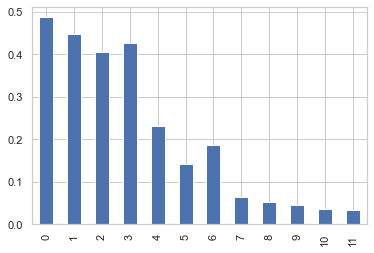

In [105]:
final_effect['value%'].plot.bar()

In [106]:
new_improved_sku2 = improved_sku[['Date','Forecast','Covered Sales','after_coverage']]
new_improved_sku2

,Date,Forecast,Covered Sales,after_coverage
0,2020-09-01,4.520618e+06,261034.658936,3.642803e+06
1,2020-10-01,8.283735e+06,518119.602362,8.150899e+06
2,2020-11-01,6.869800e+06,230313.381708,5.619227e+06
3,2020-12-01,2.007565e+07,821567.892029,1.570066e+07
4,2021-01-01,1.207900e+07,369569.069003,1.072450e+07
5,2021-02-01,1.099829e+07,561154.577514,8.709840e+06
6,2021-03-01,1.270602e+07,336921.905560,1.152871e+07
7,2021-04-01,1.200821e+07,248789.885020,9.592971e+06
8,2021-05-01,1.293703e+07,332173.627933,1.100131e+07
9,2021-06-01,1.915270e+07,470654.278531,1.823971e+07


In [107]:
est_sub_effect = new_improved_sku2.merge(final_effect, on= 'Date')[['Forecast_x', 'Covered Sales_x', 'after_coverage','Missed Sales_y']]
est_sub_effect['sub_adjusted_coverage'] = est_sub_effect['after_coverage'] - est_sub_effect['Missed Sales_y']
est_sub_effect

,Forecast_x,Covered Sales_x,after_coverage,Missed Sales_y,sub_adjusted_coverage
0,4.520618e+06,261034.658936,3.642803e+06,-7.099661e+05,4.352769e+06
1,8.283735e+06,518119.602362,8.150899e+06,-1.230214e+06,9.381112e+06
2,6.869800e+06,230313.381708,5.619227e+06,-7.450028e+05,6.364230e+06
3,2.007565e+07,821567.892029,1.570066e+07,-3.057445e+06,1.875810e+07
4,1.207900e+07,369569.069003,1.072450e+07,-9.253823e+05,1.164988e+07
5,1.099829e+07,561154.577514,8.709840e+06,-6.127149e+05,9.322554e+06
6,1.270602e+07,336921.905560,1.152871e+07,-7.347711e+05,1.226348e+07
7,1.200821e+07,248789.885020,9.592971e+06,-2.408272e+05,9.833798e+06
8,1.293703e+07,332173.627933,1.100131e+07,-2.332587e+05,1.123456e+07
9,1.915270e+07,470654.278531,1.823971e+07,-3.158394e+05,1.855555e+07


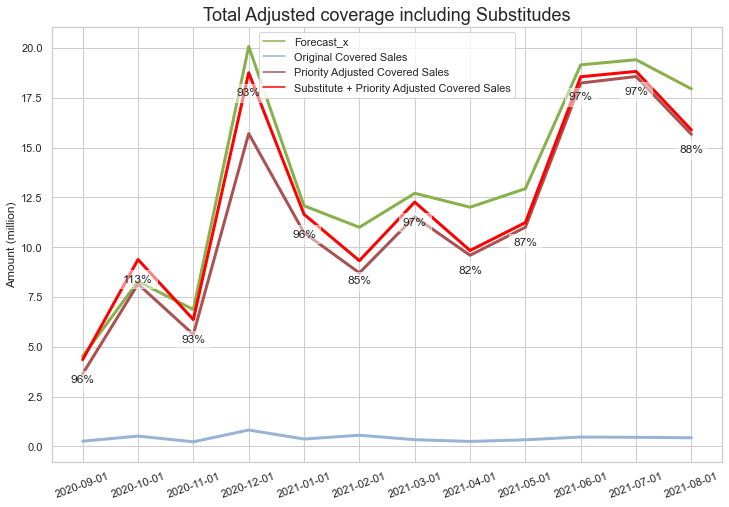

In [108]:
plt.close()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

sns.lineplot(data=est_sub_effect[['Forecast_x','Covered Sales_x','after_coverage','sub_adjusted_coverage']]/1e6, ax=ax, palette=['#88B04B', '#98B4D4', '#AA5251','red'], linewidth=3, dashes=False)

for i in range(12):
    perc = est_sub_effect.sub_adjusted_coverage.iloc[i]/est_sub_effect.Forecast_x.iloc[i]*100
    ax.text(i, est_sub_effect.sub_adjusted_coverage.iloc[i]/1e6-0.75, f'{perc:.0f}%', ha='center', va='top', bbox={'facecolor':'w', 'alpha':0.5})

ax.set_ylabel('Amount (million)')
ax.set_xticks(np.arange(12))
ax.set_xticklabels(dates, rotation=20)
L=plt.legend()
L.get_texts()[1].set_text('Original Covered Sales')
L.get_texts()[2].set_text('Priority Adjusted Covered Sales')
L.get_texts()[3].set_text('Substitute + Priority Adjusted Covered Sales')
plt.title('Total Adjusted coverage including Substitudes', fontsize= 18)
fig.savefig(f'../plots/newplot/SKU_SelectionResult.png')

In [109]:
whole_positive_pool = Forward_coverage_positive.groupby('Date')['Forecast','Covered Sales','Missed Sales'].sum().reset_index()
whole_positive_pool

<ipython-input-109-af544650488a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  whole_positive_pool = Forward_coverage_positive.groupby('Date')['Forecast','Covered Sales','Missed Sales'].sum().reset_index()


,Date,Forecast,Covered Sales,Missed Sales
0,2020-09-01,4.520618e+06,261034.658936,4.259584e+06
1,2020-10-01,8.283735e+06,518119.602362,7.765615e+06
2,2020-11-01,6.869800e+06,230313.381708,6.639487e+06
3,2020-12-01,2.007565e+07,821567.892029,1.925408e+07
4,2021-01-01,1.207900e+07,369569.069003,1.170943e+07
5,2021-02-01,1.099829e+07,561154.577514,1.043713e+07
6,2021-03-01,1.270602e+07,336921.905560,1.236910e+07
7,2021-04-01,1.200821e+07,248789.885020,1.175942e+07
8,2021-05-01,1.293703e+07,332173.627933,1.260486e+07
9,2021-06-01,1.915270e+07,470654.278531,1.868205e+07


In [110]:
final_effect # sub effect

,Date,Forecast,Covered Sales,Missed Sales,forecast n_items,Covered Sales n_items,Missed Sales n_items,Missed Sales_y,Missed Sales n_items_y,value%,count%
0,2020-09-01,1.597873e+06,142316.613623,1.455556e+06,15216.244131,1218.574621,13997.669511,-7.099661e+05,-5095.314477,0.487763,0.364012
1,2020-10-01,2.992709e+06,250822.553924,2.741886e+06,30806.432339,2659.260502,28147.171837,-1.230214e+06,-8550.735817,0.448674,0.303787
2,2020-11-01,1.923282e+06,82876.182124,1.840406e+06,19736.899086,954.882156,18782.016930,-7.450028e+05,-4376.509249,0.404803,0.233016
3,2020-12-01,7.584075e+06,398512.852498,7.176972e+06,71109.548670,4066.660685,66967.637730,-3.057445e+06,-13443.814588,0.426008,0.200751
4,2021-01-01,4.162452e+06,166497.261715,3.995955e+06,35297.893960,1818.474467,33479.419493,-9.253823e+05,-4775.636765,0.231580,0.142644
5,2021-02-01,4.447319e+06,136459.108262,4.310859e+06,37619.301437,1671.242607,35948.058830,-6.127149e+05,-3372.682339,0.142133,0.093821
6,2021-03-01,4.129059e+06,170237.905064,3.958822e+06,39979.789625,1912.426466,38067.363159,-7.347711e+05,-3827.334960,0.185603,0.100541
7,2021-04-01,3.979105e+06,142079.553454,3.837025e+06,39669.012943,1460.123045,38208.889898,-2.408272e+05,-1939.745503,0.062764,0.050767
8,2021-05-01,4.755117e+06,173577.457085,4.581539e+06,54748.284480,1982.437315,52765.847166,-2.332587e+05,-2471.849553,0.050913,0.046846
9,2021-06-01,7.198352e+06,287074.243250,6.909040e+06,81850.954295,3414.830977,78416.522162,-3.158394e+05,-4142.442203,0.045714,0.052826


In [111]:
improved_sku # priority 

,Date,Forecast,Covered Sales,cumsum,after_coverage
0,2020-09-01,4.520618e+06,261034.658936,3.381768e+06,3.642803e+06
1,2020-10-01,8.283735e+06,518119.602362,7.632779e+06,8.150899e+06
2,2020-11-01,6.869800e+06,230313.381708,5.388914e+06,5.619227e+06
3,2020-12-01,2.007565e+07,821567.892029,1.487909e+07,1.570066e+07
4,2021-01-01,1.207900e+07,369569.069003,1.035493e+07,1.072450e+07
5,2021-02-01,1.099829e+07,561154.577514,8.148685e+06,8.709840e+06
6,2021-03-01,1.270602e+07,336921.905560,1.119178e+07,1.152871e+07
7,2021-04-01,1.200821e+07,248789.885020,9.344181e+06,9.592971e+06
8,2021-05-01,1.293703e+07,332173.627933,1.066913e+07,1.100131e+07
9,2021-06-01,1.915270e+07,470654.278531,1.776906e+07,1.823971e+07


In [112]:
tot_eval = whole_positive_pool.merge(final_effect, on= 'Date')[['Date','Forecast_x', 'Covered Sales_x', 'Missed Sales_y']]
tot_eval.columns = ['Date','Forecast_tot','Covered Sales_tot','Missed Sales_tot','Missed Sales_sub']
tot_eval

,Date,Forecast_tot,Covered Sales_tot,Missed Sales_tot,Missed Sales_sub
0,2020-09-01,4.520618e+06,261034.658936,1.455556e+06,-7.099661e+05
1,2020-10-01,8.283735e+06,518119.602362,2.741886e+06,-1.230214e+06
2,2020-11-01,6.869800e+06,230313.381708,1.840406e+06,-7.450028e+05
3,2020-12-01,2.007565e+07,821567.892029,7.176972e+06,-3.057445e+06
4,2021-01-01,1.207900e+07,369569.069003,3.995955e+06,-9.253823e+05
5,2021-02-01,1.099829e+07,561154.577514,4.310859e+06,-6.127149e+05
6,2021-03-01,1.270602e+07,336921.905560,3.958822e+06,-7.347711e+05
7,2021-04-01,1.200821e+07,248789.885020,3.837025e+06,-2.408272e+05
8,2021-05-01,1.293703e+07,332173.627933,4.581539e+06,-2.332587e+05
9,2021-06-01,1.915270e+07,470654.278531,6.909040e+06,-3.158394e+05


In [113]:
tot_eval2 = tot_eval.merge(improved_sku, on = 'Date')[['Date','Forecast_tot','Covered Sales_tot','Missed Sales_sub','cumsum']]
tot_eval2

,Date,Forecast_tot,Covered Sales_tot,Missed Sales_sub,cumsum
0,2020-09-01,4.520618e+06,261034.658936,-7.099661e+05,3.381768e+06
1,2020-10-01,8.283735e+06,518119.602362,-1.230214e+06,7.632779e+06
2,2020-11-01,6.869800e+06,230313.381708,-7.450028e+05,5.388914e+06
3,2020-12-01,2.007565e+07,821567.892029,-3.057445e+06,1.487909e+07
4,2021-01-01,1.207900e+07,369569.069003,-9.253823e+05,1.035493e+07
5,2021-02-01,1.099829e+07,561154.577514,-6.127149e+05,8.148685e+06
6,2021-03-01,1.270602e+07,336921.905560,-7.347711e+05,1.119178e+07
7,2021-04-01,1.200821e+07,248789.885020,-2.408272e+05,9.344181e+06
8,2021-05-01,1.293703e+07,332173.627933,-2.332587e+05,1.066913e+07
9,2021-06-01,1.915270e+07,470654.278531,-3.158394e+05,1.776906e+07


In [114]:
tot_eval2['pri_effect']= tot_eval2['Covered Sales_tot']+tot_eval2['cumsum']
tot_eval2['pri+sub_effect'] = tot_eval2['Covered Sales_tot']+tot_eval2['cumsum']-tot_eval2['Missed Sales_sub']
tot_eval2['pri+sub_effect_min'] = tot_eval2[['pri+sub_effect', 'Forecast_tot']].min(axis=1)
tot_eval2

,Date,Forecast_tot,Covered Sales_tot,Missed Sales_sub,cumsum,pri_effect,pri+sub_effect,pri+sub_effect_min
0,2020-09-01,4.520618e+06,261034.658936,-7.099661e+05,3.381768e+06,3.642803e+06,4.352769e+06,4.352769e+06
1,2020-10-01,8.283735e+06,518119.602362,-1.230214e+06,7.632779e+06,8.150899e+06,9.381112e+06,8.283735e+06
2,2020-11-01,6.869800e+06,230313.381708,-7.450028e+05,5.388914e+06,5.619227e+06,6.364230e+06,6.364230e+06
3,2020-12-01,2.007565e+07,821567.892029,-3.057445e+06,1.487909e+07,1.570066e+07,1.875810e+07,1.875810e+07
4,2021-01-01,1.207900e+07,369569.069003,-9.253823e+05,1.035493e+07,1.072450e+07,1.164988e+07,1.164988e+07
5,2021-02-01,1.099829e+07,561154.577514,-6.127149e+05,8.148685e+06,8.709840e+06,9.322554e+06,9.322554e+06
6,2021-03-01,1.270602e+07,336921.905560,-7.347711e+05,1.119178e+07,1.152871e+07,1.226348e+07,1.226348e+07
7,2021-04-01,1.200821e+07,248789.885020,-2.408272e+05,9.344181e+06,9.592971e+06,9.833798e+06,9.833798e+06
8,2021-05-01,1.293703e+07,332173.627933,-2.332587e+05,1.066913e+07,1.100131e+07,1.123456e+07,1.123456e+07
9,2021-06-01,1.915270e+07,470654.278531,-3.158394e+05,1.776906e+07,1.823971e+07,1.855555e+07,1.855555e+07


In [115]:
tot_eval2['orriginal_coverage&']= tot_eval2['Covered Sales_tot']/tot_eval2['Forecast_tot']

In [116]:
tot_eval2.mean()

Forecast_tot           1.308232e+07
Covered Sales_tot      4.199692e+05
Missed Sales_sub      -7.734167e+05
cumsum                 1.100845e+07
pri_effect             1.142842e+07
pri+sub_effect         1.220183e+07
pri+sub_effect_min     1.211039e+07
orriginal_coverage&    3.512289e-02
dtype: float64

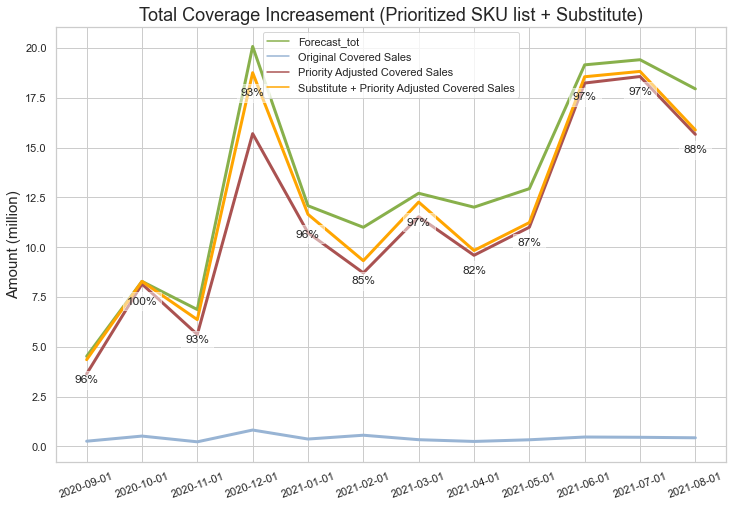

In [117]:
plt.close()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

sns.lineplot(data=tot_eval2[['Forecast_tot','Covered Sales_tot','pri_effect','pri+sub_effect_min']]/1e6, ax=ax, palette=['#88B04B', '#98B4D4', '#AA5251','#ffa500'], linewidth=3, dashes=False)

for i in range(12):
    perc = tot_eval2['pri+sub_effect_min'].iloc[i]/tot_eval2.Forecast_tot.iloc[i]*100
    ax.text(i, tot_eval2['pri+sub_effect_min'].iloc[i]/1e6-0.75, f'{perc:.0f}%', ha='center', va='top', bbox={'facecolor':'w', 'alpha':0.5})

ax.set_ylabel('Amount (million)', fontsize= 15)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(dates, rotation=20)
L=plt.legend()
L.get_texts()[1].set_text('Original Covered Sales')
L.get_texts()[2].set_text('Priority Adjusted Covered Sales')
L.get_texts()[3].set_text('Substitute + Priority Adjusted Covered Sales')
plt.title('Total Coverage Increasement (Prioritized SKU list + Substitute)', fontsize= 18)
fig.savefig(f'../plots/newplot/SKU_SelectionResult.png')

In [118]:
tot_eval2['Covered Sales_tot'].sum()/tot_eval2.Forecast_tot.sum()

0.03210204993468574